### Import Library

In [ ]:
#Import Library

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import SimpleRNN,  Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from google.colab import drive
from datetime import timedelta, datetime
import zipfile
from google.colab import files

### Import Data

In [ ]:
#Cek Data
data = pd.read_csv("merged_data3.csv", delimiter=",")
data.tail(10)

Date   Date_int  User  New User  Real User  \
351   6-Jul-23   7/6/2023   127       119        246   
352   7-Jul-23   7/7/2023   114       109        223   
353   8-Jul-23   7/8/2023   132       125        257   
354   9-Jul-23   7/9/2023   153       144        297   
355  10-Jul-23  7/10/2023    91        83        174   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
351              48                 38  
352              42                 30  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
data_dropped = data.dropna()

In [ ]:
data_dropped.tail(10)

Date   Date_int  User  New User  Real User  \
351   6-Jul-23   7/6/2023   127       119        246   
352   7-Jul-23   7/7/2023   114       109        223   
353   8-Jul-23   7/8/2023   132       125        257   
354   9-Jul-23   7/9/2023   153       144        297   
355  10-Jul-23  7/10/2023    91        83        174   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
351              48                 38  
352              42                 30  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
#Ubah Tipe Date agar masuk ke pandas
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index and keep the column
data.set_index('Date', inplace=True, drop=False)



<ipython-input-5-d8d7a9a4c1d8>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data_dropped

Date   Date_int  User  New User  Real User  \
0    20-Jul-22  7/20/2022   104        96        200   
1    21-Jul-22  7/21/2022    73        66        139   
2    22-Jul-22  7/22/2022    63        61        124   
3    23-Jul-22  7/23/2022    48        45         93   
4    24-Jul-22  7/24/2022    38        37         75   
..         ...        ...   ...       ...        ...   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

## Real User

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

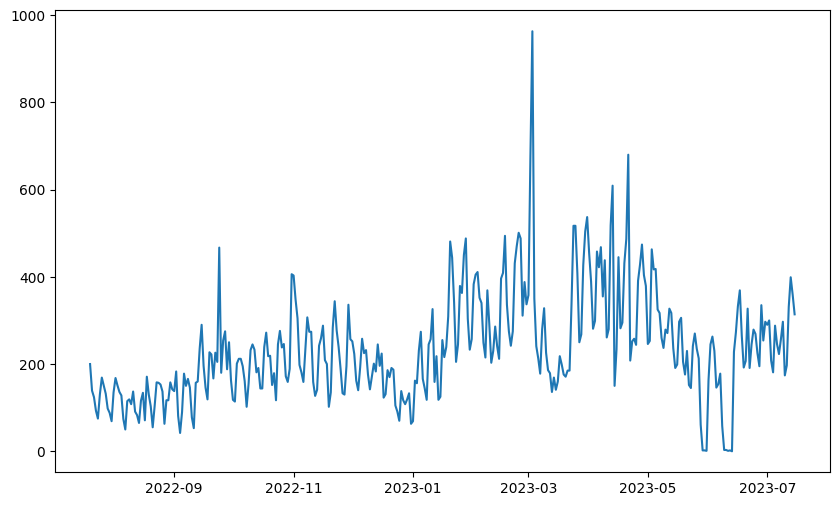

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data["Date_int"], data["Real User"])
plt.show()

In [ ]:
# Setting 353 percent data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["Real User"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.20768432]
 [0.1443406 ]
 [0.12876428]
 [0.09657321]
 [0.07788162]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["Real User"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.36888889] [0.54666667] [0.] [0.10222222] [0.69777778]


Scale


In [ ]:
X_train = []
y_train = []
for i in range(5, len(scaled_train)):
    X_train.append(scaled_train[i-5:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 2:
        print(X_train)
        print(y_train)
        print()

In [ ]:
X_test = []
y_test = []
for i in range(1, len(scaled_test)):
    X_test.append(scaled_test[i-1:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:

# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (348, 5, 1) y_train : (348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (7, 1, 1) y_test : (7, 1)


In [ ]:
X_train

array([[[0.20768432],
        [0.1443406 ],
        [0.12876428],
        [0.09657321],
        [0.07788162]],

       [[0.1443406 ],
        [0.12876428],
        [0.09657321],
        [0.07788162],
        [0.13499481]],

       [[0.12876428],
        [0.09657321],
        [0.07788162],
        [0.13499481],
        [0.17549325]],

       ...,

       [[0.30841121],
        [0.30114226],
        [0.31152648],
        [0.21599169],
        [0.18795431]],

       [[0.30114226],
        [0.31152648],
        [0.21599169],
        [0.18795431],
        [0.29906542]],

       [[0.31152648],
        [0.21599169],
        [0.18795431],
        [0.29906542],
        [0.25545171]]])

In [ ]:
X_test

array([[[0.36888889]],

       [[0.54666667]],

       [[0.        ]],

       [[0.10222222]],

       [[0.69777778]],

       [[1.        ]],

       [[0.82222222]]])

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

#Fitting the model
model = regressorLSTM.fit(X_train,
                         y_train,
                         validation_split = 0.3,
                         batch_size = 32,
                         epochs = 250)

regressorLSTM.summary()

Epoch 1/250
8/8 [==============================] - 11s 194ms/step - loss: 0.0468 - mae: 0.1808 - mape: 76.5126 - val_loss: 0.0395 - val_mae: 0.1680 - val_mape: 853419.0625
Epoch 2/250
8/8 [==============================] - 0s 16ms/step - loss: 0.0143 - mae: 0.0827 - mape: 41.3673 - val_loss: 0.0159 - val_mae: 0.1022 - val_mape: 1831225.5000
Epoch 3/250
8/8 [==============================] - 0s 15ms/step - loss: 0.0139 - mae: 0.0966 - mape: 63.3426 - val_loss: 0.0154 - val_mae: 0.0991 - val_mape: 1592151.1250
Epoch 4/250
8/8 [==============================] - 0s 16ms/step - loss: 0.0109 - mae: 0.0740 - mape: 41.9061 - val_loss: 0.0196 - val_mae: 0.1065 - val_mape: 1208225.5000
Epoch 5/250
8/8 [==============================] - 0s 16ms/step - loss: 0.0114 - mae: 0.0716 - mape: 35.8376 - val_loss: 0.0177 - val_mae: 0.1026 - val_mape: 1261381.6250
Epoch 6/250
8/8 [==============================] - 0s 17ms/step - loss: 0.0106 - mae: 0.0722 - mape: 40.4899 - val_loss: 0.0155 - val_mae: 0.099

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


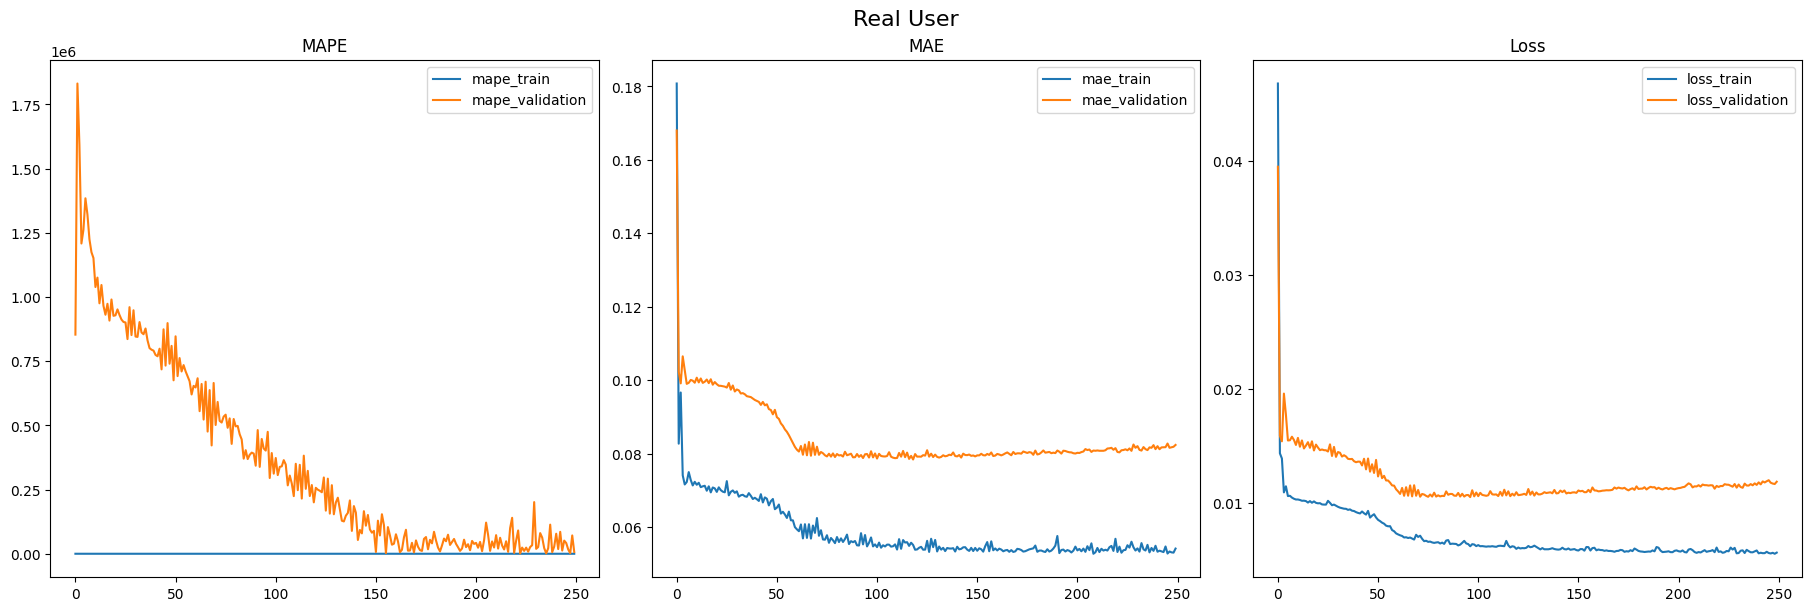

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('Real User', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_ru.png')

plt.show()


In [ ]:
# Mendapatkan prediksi untuk data train dan data test
train_predicted = regressorLSTM.predict(X_train)
test_predicted = regressorLSTM.predict(X_test)

# Menghitung nilai loss (dalam hal ini, MSE) untuk data train dan data test
train_score = regressorLSTM.evaluate(X_train, y_train)
test_score = regressorLSTM.evaluate(X_test, y_test)

# Menghitung RMSE untuk data train dan data test
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

print(f"Train Score (MSE): {train_score}")
print(f"Test Score (MSE): {test_score}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")

1/1 [==============================] - 0s 36ms/step - loss: 0.1411 - mae: 0.3152 - mape: 50120448.0000
Train Score (MSE): [0.007425158284604549, 0.0617111399769783, 2184.986572265625]
Test Score (MSE): [0.14110426604747772, 0.315234512090683, 50120448.0]
Train Score (RMSE): 0.0861693544869073
Test Score (RMSE): 0.3756384817810267


In [ ]:
# scaling back from 0-1 to original
y_LSTM_O_RU = scaler.inverse_transform(test_predicted)

print(y_LSTM_O_RU)

[[218.40044]
 [246.88446]
 [169.27171]
 [181.1807 ]
 [271.93698]
 [320.84302]
 [292.42984]]


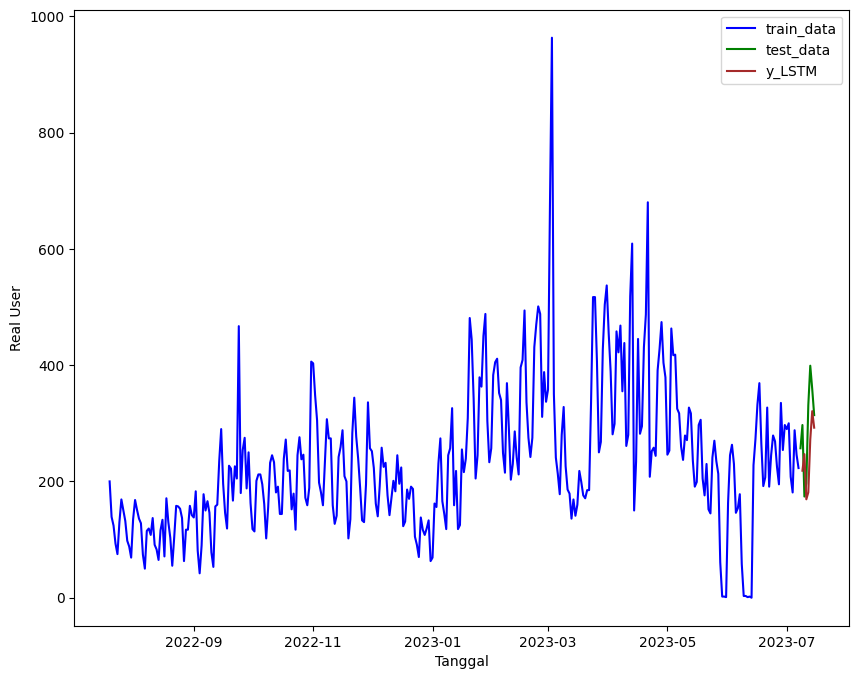

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(train_data["Date_int"], train_data["Real User"], label="train_data", color="b")
plt.plot(test_data["Date_int"], test_data["Real User"], label="test_data", color="g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_RU, label="y_LSTM", color="brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("Real User")
plt.show()

In [ ]:
import datetime

# Mengambil 7 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_7_days = data['Real User'] [-7:]  # menggunakan 7 hari terakhir

# Konversi ke array numpy
last_7_days_array = last_7_days.values.reshape(-1, 1)

# Normalisasi data untuk 7 hari terakhir

last_7_days_normalized = scaler.transform(last_7_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_ru = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_7_days_normalized.reshape(1, len(last_7_days_normalized), 1)

# Memperluas model untuk memprediksi 7 hari ke depan secara berurutan
for i in range(7):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_ru.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_ru = scaler.inverse_transform(np.array(predicted_values_ru).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 7 hari ke dalam data tanggal yang terakhir
for i in range(1, 8):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 7 hari ke depan
for date, value in zip(predicted_dates, predicted_values_ru):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 28ms/step
07/08/2023: 247.66799926757812
07/09/2023: 219.47357177734375
07/10/2023: 234.22129821777344
07/11/2023: 288.0871887207031
07/12/2023: 413.7386169433594
07/13/2023: 437.8141784667969
07/14/2023: 263.89068603515625


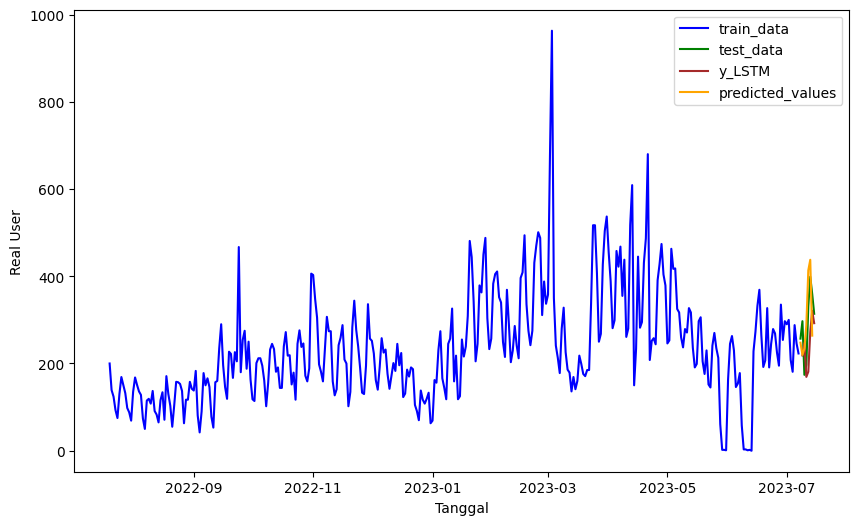

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["Real User"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["Real User"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_RU, label = "y_LSTM", color = "brown")


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_ru, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("Real User")
from datetime import datetime

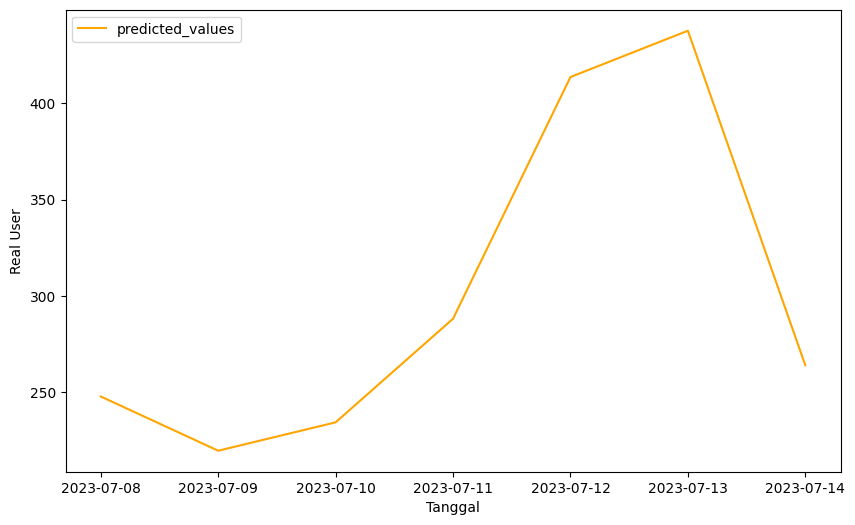

In [ ]:
plt.figure(figsize=(10,6))


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_ru, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("Real User")
from datetime import datetime

### Keyword

In [ ]:
#Cek Data
datas = pd.read_csv("merged_data3.csv", delimiter=",")
data_dropped.tail(10)


Date   Date_int  User  New User  Real User  \
351   6-Jul-23   7/6/2023   127       119        246   
352   7-Jul-23   7/7/2023   114       109        223   
353   8-Jul-23   7/8/2023   132       125        257   
354   9-Jul-23   7/9/2023   153       144        297   
355  10-Jul-23  7/10/2023    91        83        174   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
351              48                 38  
352              42                 30  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
columns_to_drop = ['iot', 'machine learning', 'bisnis digital', 'kecerdasan buatan']
data_vending_machine = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine', 'machine learning', 'bisnis digital', 'kecerdasan buatan']
data_iot = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine', 'iot', 'bisnis digital', 'kecerdasan buatan']
data_machine_learning = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine', 'iot', 'machine learning', 'kecerdasan buatan']
data_bisnis_digital = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine','iot', 'machine learning', 'bisnis digital']
data_kecerdasan_buatan = data_dropped.drop(columns=columns_to_drop)



## Vending Machine

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
   #day, month, year = int(split[0]), int(split[1]), int(split[2])
   #year, month, day = int(split[0]), int(split[1]), int(split[2])
    #return datetime.datetime(year=year, month=month, day=day)
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

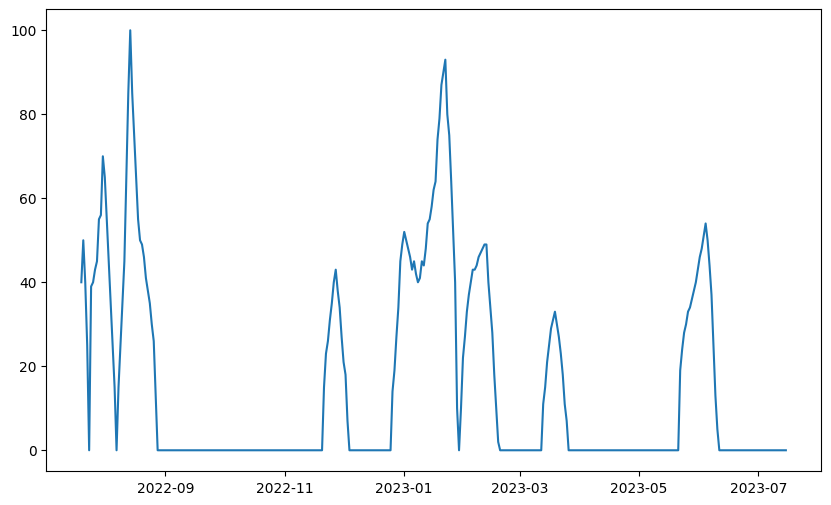

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data["Date_int"], data["vending machine"])
plt.show()

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["vending machine"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.4 ]
 [0.5 ]
 [0.4 ]
 [0.25]
 [0.  ]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["vending machine"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.] [0.] [0.] [0.] [0.]


In [ ]:
X_train = []
y_train = []
for i in range(5, len(scaled_train)):
    X_train.append(scaled_train[i-5:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 12:
        print(X_train)
        print(y_train)
        print()

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ])]
[0.39]

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ]), array([0.5 , 0.4 , 0.25, 0.  , 0.39])]
[0.39, 0.4]

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ]), array([0.5 , 0.4 , 0.25, 0.  , 0.39]), array([0.4 , 0.25, 0.  , 0.39, 0.4 ])]
[0.39, 0.4, 0.43]

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ]), array([0.5 , 0.4 , 0.25, 0.  , 0.39]), array([0.4 , 0.25, 0.  , 0.39, 0.4 ]), array([0.25, 0.  , 0.39, 0.4 , 0.43])]
[0.39, 0.4, 0.43, 0.45]

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ]), array([0.5 , 0.4 , 0.25, 0.  , 0.39]), array([0.4 , 0.25, 0.  , 0.39, 0.4 ]), array([0.25, 0.  , 0.39, 0.4 , 0.43]), array([0.  , 0.39, 0.4 , 0.43, 0.45])]
[0.39, 0.4, 0.43, 0.45, 0.55]

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ]), array([0.5 , 0.4 , 0.25, 0.  , 0.39]), array([0.4 , 0.25, 0.  , 0.39, 0.4 ]), array([0.25, 0.  , 0.39, 0.4 , 0.43]), array([0.  , 0.39, 0.4 , 0.43, 0.45]), array([0.39, 0.4 , 0.43, 0.45, 0.55])]
[0.39, 0.4, 0.43, 0.45, 0.55, 0.56]

[array([0.4 , 0.5 , 0.4 , 0.25, 0.  ]), ar

In [ ]:
X_test = []
y_test = []
for i in range(1, len(scaled_test)):
    X_test.append(scaled_test[i-1:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (348, 5, 1) y_train : (348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (7, 1, 1) y_test : (7, 1)


In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

#Fitting the model
model = regressorLSTM.fit(X_train,
                         y_train,
                         validation_split = 0.3,
                         batch_size = 32,
                         epochs = 250)

regressorLSTM.summary()

Epoch 1/250
8/8 [==============================] - 5s 131ms/step - loss: 0.0782 - mae: 0.1829 - mape: 17252936.0000 - val_loss: 0.0165 - val_mae: 0.1061 - val_mape: 62136172.0000
Epoch 2/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0402 - mae: 0.1641 - mape: 64311168.0000 - val_loss: 0.0257 - val_mae: 0.1556 - val_mape: 131479760.0000
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0326 - mae: 0.1577 - mape: 93767144.0000 - val_loss: 0.0212 - val_mae: 0.1381 - val_mape: 115433472.0000
Epoch 4/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0252 - mae: 0.1319 - mape: 61811524.0000 - val_loss: 0.0094 - val_mae: 0.0839 - val_mape: 53626072.0000
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0224 - mae: 0.1089 - mape: 32633180.0000 - val_loss: 0.0077 - val_mae: 0.0641 - val_mape: 33802248.0000
Epoch 6/250
8/8 [==============================] - 0s 10ms/step - loss: 0.0211 - mae: 0.1009 - mape: 262216

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


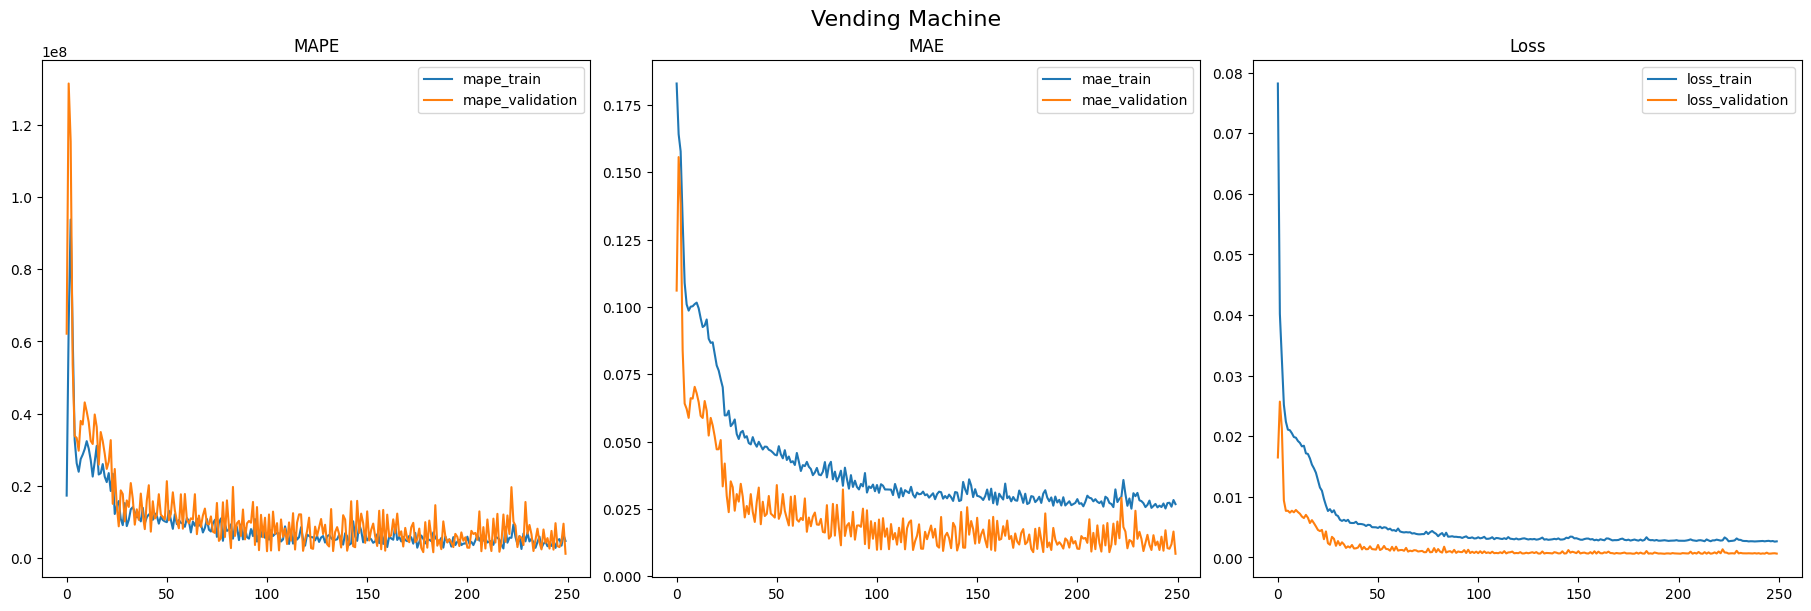

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('Vending Machine', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_vm.png')

plt.show()

In [ ]:
# Mendapatkan prediksi untuk data train dan data test
train_predicted = regressorLSTM.predict(X_train)
test_predicted = regressorLSTM.predict(X_test)

# Menghitung nilai loss (dalam hal ini, MSE) untuk data train dan data test
train_score = regressorLSTM.evaluate(X_train, y_train)
test_score = regressorLSTM.evaluate(X_test, y_test)

# Menghitung RMSE untuk data train dan data test
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

print(f"Train Score (MSE): {train_score}")
print(f"Test Score (MSE): {test_score}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")

1/1 [==============================] - 1s 700ms/step - loss: 1.4596e-04 - mae: 0.0121 - mape: 12081234.0000
Train Score (MSE): [0.001995663158595562, 0.01877676695585251, 1372788.875]
Test Score (MSE): [0.00014595624816138297, 0.012081235647201538, 12081234.0]
Train Score (RMSE): 0.0446728451688003
Test Score (RMSE): 0.012081235647201538


In [ ]:
# scaling back from 0-1 to original
y_LSTM_O_VM = scaler.inverse_transform(test_predicted)

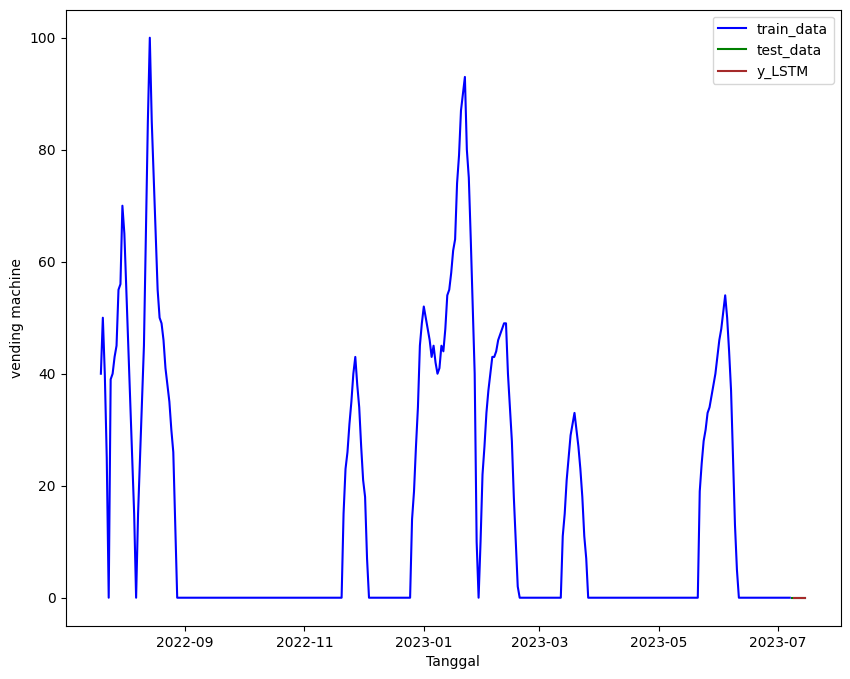

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(train_data["Date_int"], train_data["vending machine"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["vending machine"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_VM, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("vending machine")
from datetime import datetime

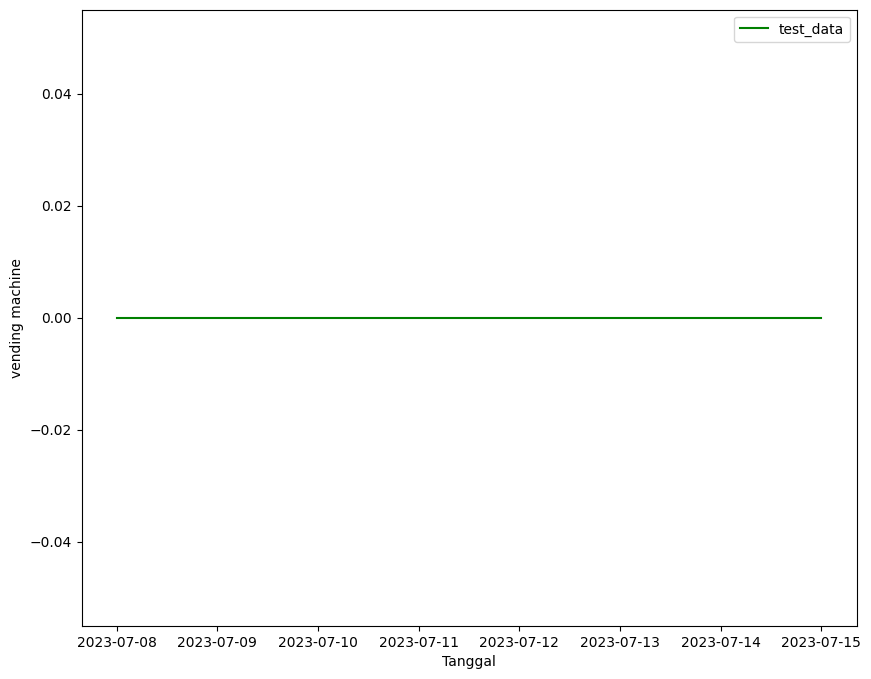

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(test_data["Date_int"], test_data["vending machine"], label = "test_data", color = "g")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("vending machine")
from datetime import datetime

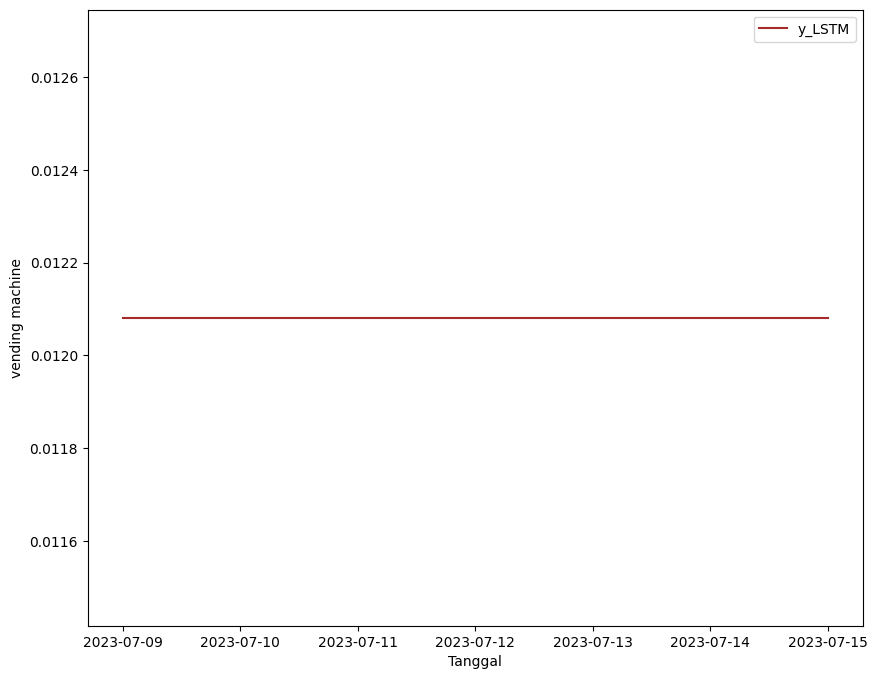

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_VM, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("vending machine")
from datetime import datetime

In [ ]:
import datetime

# Mengambil 7 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_7_days = data['vending machine'] [-7:]  # Misalnya, Anda menggunakan 7 hari terakhir

# Konversi ke array numpy
last_7_days_array = last_7_days.values.reshape(-1, 1)

# Normalisasi data untuk 7 hari terakhir
last_7_days_normalized = scaler.transform(last_7_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_vm = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_7_days_normalized.reshape(1, len(last_7_days_normalized), 1)

# Memperluas model untuk memprediksi 7 hari ke depan secara berurutan
for i in range(7):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_vm.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_vm = scaler.inverse_transform(np.array(predicted_values_vm).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 7 hari ke dalam data tanggal yang terakhir
for i in range(1,8 ):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 5 hari ke depan
for date, value in zip(predicted_dates, predicted_values_vm):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 18ms/step
07/08/2023: 0.002759956056252122
07/09/2023: 0.006081223487854004
07/10/2023: 0.009981155395507812
07/11/2023: 0.014661427587270737
07/12/2023: 0.020244751125574112
07/13/2023: 0.026888854801654816
07/14/2023: 0.034799594432115555


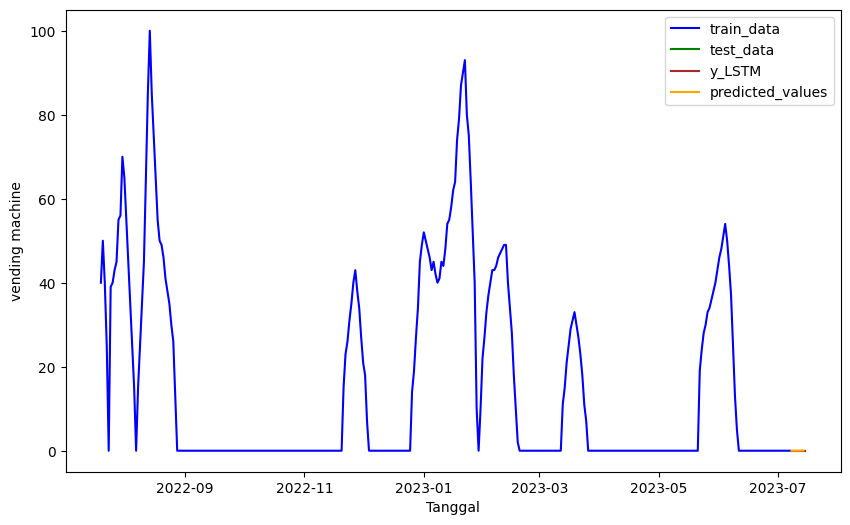

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["vending machine"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["vending machine"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_VM, label = "y_LSTM", color = "brown")


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_vm, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("vending machine")
from datetime import datetime

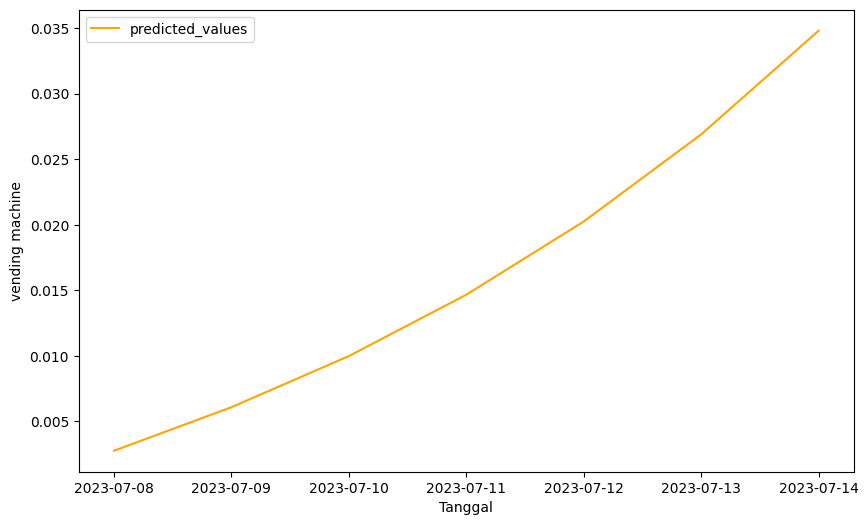

In [ ]:
plt.figure(figsize=(10,6))


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_vm, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("vending machine")
from datetime import datetime

## IOT

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
   #day, month, year = int(split[0]), int(split[1]), int(split[2])
   #year, month, day = int(split[0]), int(split[1]), int(split[2])
    #return datetime.datetime(year=year, month=month, day=day)
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

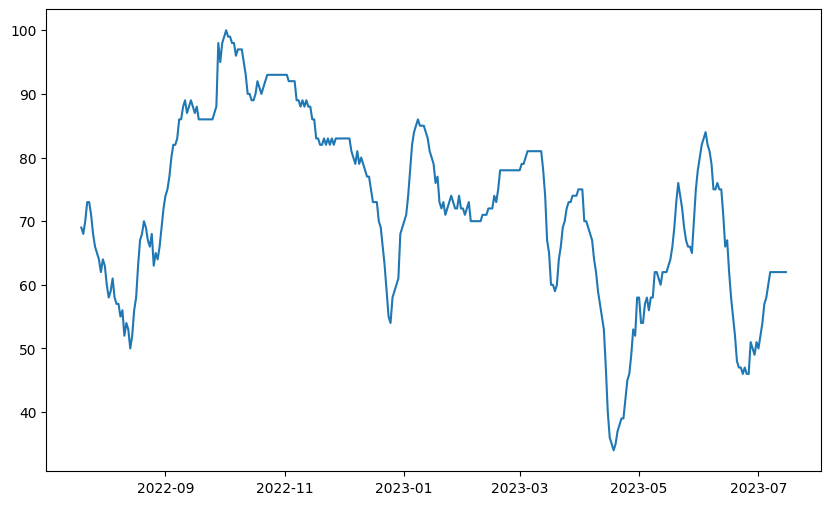

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data["Date_int"], data["iot"])
plt.show()

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["iot"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.53030303]
 [0.51515152]
 [0.54545455]
 [0.59090909]
 [0.59090909]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["iot"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.] [0.] [0.] [0.] [0.]


In [ ]:
X_train = []
y_train = []
for i in range(5, len(scaled_train)):
    X_train.append(scaled_train[i-5:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.53030303, 0.51515152, 0.54545455, 0.59090909, 0.59090909])]
[0.5606060606060606]

[array([0.53030303, 0.51515152, 0.54545455, 0.59090909, 0.59090909]), array([0.51515152, 0.54545455, 0.59090909, 0.59090909, 0.56060606])]
[0.5606060606060606, 0.5151515151515151]

[array([0.53030303, 0.51515152, 0.54545455, 0.59090909, 0.59090909]), array([0.51515152, 0.54545455, 0.59090909, 0.59090909, 0.56060606]), array([0.54545455, 0.59090909, 0.59090909, 0.56060606, 0.51515152])]
[0.5606060606060606, 0.5151515151515151, 0.48484848484848486]

[array([0.53030303, 0.51515152, 0.54545455, 0.59090909, 0.59090909]), array([0.51515152, 0.54545455, 0.59090909, 0.59090909, 0.56060606]), array([0.54545455, 0.59090909, 0.59090909, 0.56060606, 0.51515152]), array([0.59090909, 0.59090909, 0.56060606, 0.51515152, 0.48484848])]
[0.5606060606060606, 0.5151515151515151, 0.48484848484848486, 0.4696969696969697]

[array([0.53030303, 0.51515152, 0.54545455, 0.59090909, 0.59090909]), array([0.51515152, 0.54545

In [ ]:
X_test = []
y_test = []
for i in range(1, len(scaled_test)):
    X_test.append(scaled_test[i-1:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (348, 5, 1) y_train : (348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (7, 1, 1) y_test : (7, 1)


In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

#Fitting the model
model = regressorLSTM.fit(X_train,
                         y_train,
                         validation_split = 0.3,
                         batch_size = 32,
                         epochs = 250)

regressorLSTM.summary()

Epoch 1/250
8/8 [==============================] - 4s 117ms/step - loss: 0.4100 - mae: 0.6143 - mape: 92.2847 - val_loss: 0.0971 - val_mae: 0.2733 - val_mape: 942760.4375
Epoch 2/250
8/8 [==============================] - 0s 12ms/step - loss: 0.1526 - mae: 0.3593 - mape: 52.5670 - val_loss: 0.0149 - val_mae: 0.0983 - val_mape: 2447187.2500
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0223 - mae: 0.1268 - mape: 21.4278 - val_loss: 0.0586 - val_mae: 0.2223 - val_mape: 3991560.0000
Epoch 4/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0219 - mae: 0.1266 - mape: 22.9094 - val_loss: 0.0185 - val_mae: 0.1076 - val_mape: 3138638.0000
Epoch 5/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0101 - mae: 0.0847 - mape: 13.4492 - val_loss: 0.0133 - val_mae: 0.0887 - val_mape: 2791738.0000
Epoch 6/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0101 - mae: 0.0843 - mape: 13.3568 - val_loss: 0.0183 - val_mae: 0.1068

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


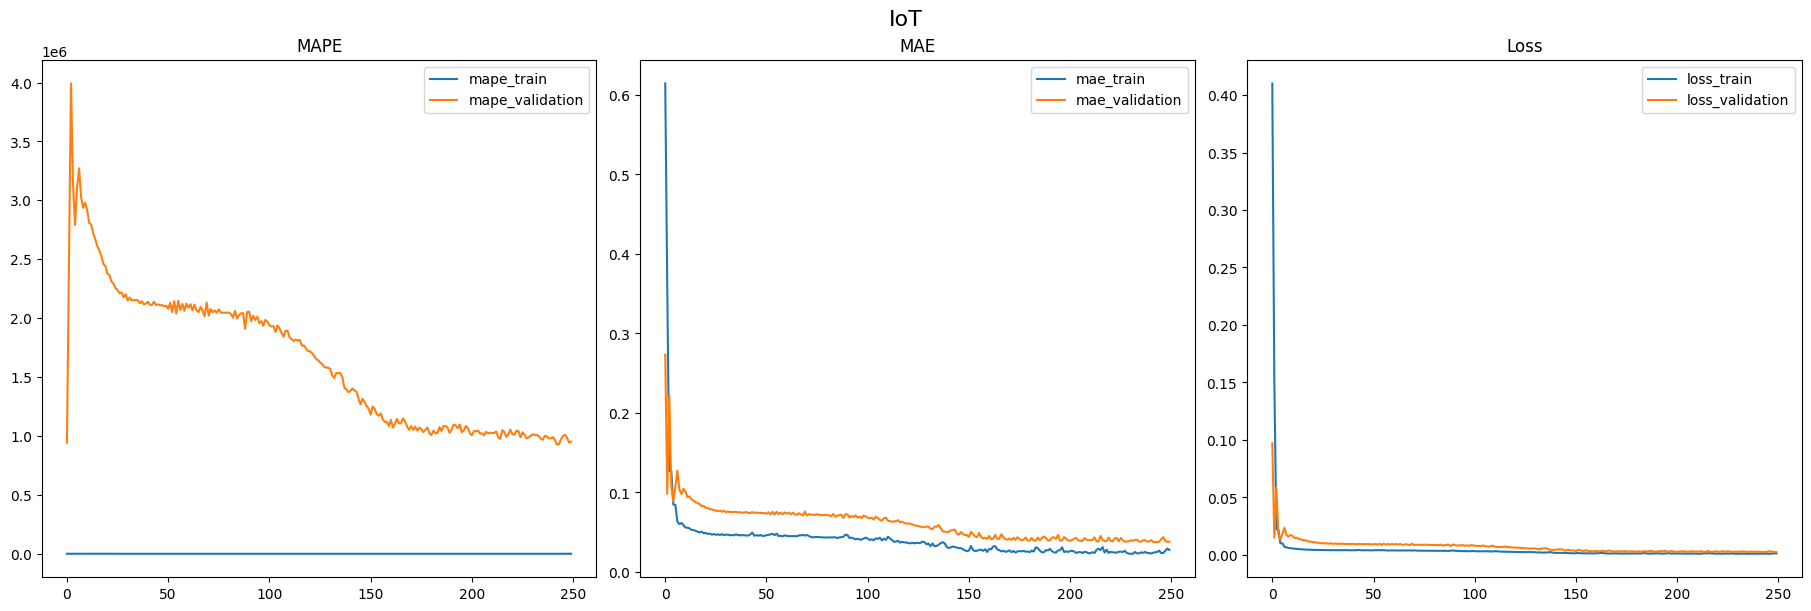

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('IoT', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_iot.png')

plt.show()


In [ ]:
# Mendapatkan prediksi untuk data train dan data test
train_predicted = regressorLSTM.predict(X_train)
test_predicted = regressorLSTM.predict(X_test)

# Menghitung nilai loss (dalam hal ini, MSE) untuk data train dan data test
train_score = regressorLSTM.evaluate(X_train, y_train)
test_score = regressorLSTM.evaluate(X_test, y_test)

# Menghitung RMSE untuk data train dan data test
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

print(f"Train Score (MSE): {train_score}")
print(f"Test Score (MSE): {test_score}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")

1/1 [==============================] - 1s 682ms/step - loss: 0.0035 - mae: 0.0594 - mape: 59417032.0000
Train Score (MSE): [0.001918179914355278, 0.03570254519581795, 287317.21875]
Test Score (MSE): [0.003530383575707674, 0.059417031705379486, 59417032.0]
Train Score (RMSE): 0.04379703113564446
Test Score (RMSE): 0.059417031705379486


In [ ]:
# scaling back from 0-1 to original
y_LSTM_O_IOT = scaler.inverse_transform(test_predicted)

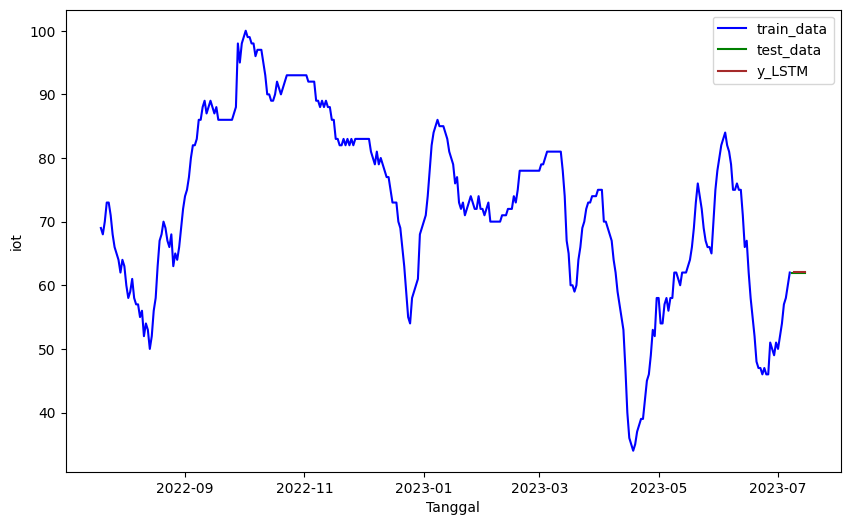

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["iot"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["iot"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_IOT, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("iot")
plt.show()

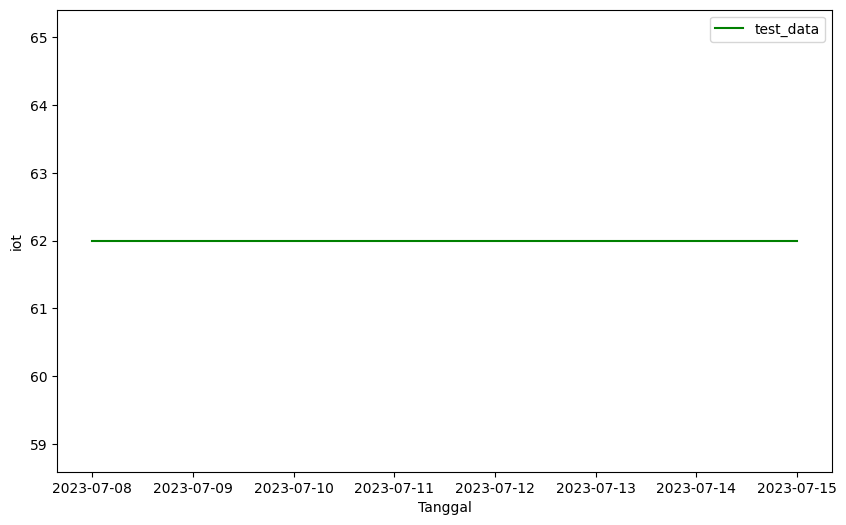

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_data["Date_int"], test_data["iot"], label = "test_data", color = "g")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("iot")
plt.show()

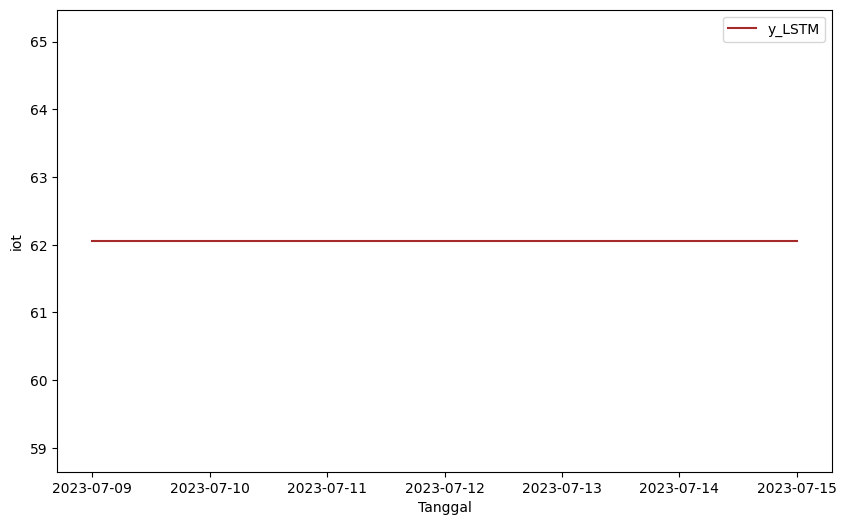

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_IOT, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("iot")
plt.show()

In [ ]:
import datetime

# Mengambil 5 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_5_days = data['iot'] [-5:]  # Misalnya, Anda menggunakan 5 hari terakhir

# Konversi ke array numpy
last_5_days_array = last_5_days.values.reshape(-1, 1)

# Normalisasi data untuk 5 hari terakhir
last_5_days_normalized = scaler.transform(last_5_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_iot = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_5_days_normalized.reshape(1, len(last_5_days_normalized), 1)

# Memperluas model untuk memprediksi 5 hari ke depan secara berurutan
for i in range(5):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_iot.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_iot = scaler.inverse_transform(np.array(predicted_values_iot).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 5 hari ke dalam data tanggal yang terakhir
for i in range(1, 6):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 5 hari ke depan
for date, value in zip(predicted_dates, predicted_values_iot):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 40ms/step
07/08/2023: 62.3607292175293
07/09/2023: 62.60091781616211
07/10/2023: 62.866310119628906
07/11/2023: 63.136478424072266
07/12/2023: 63.4053955078125


In [ ]:
# from datetime import datetime, timedelta
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming 'scaler' is already defined
# # Assuming 'regressorLSTM' is already defined
# # Assuming 'data' is already defined

# # Mengambil 5 hari terakhir dari data yang ada sebagai data input untuk prediksi
# last_5_days = data['iot'][-:]  # Misalnya, Anda menggunakan 5 hari terakhir

# # Konversi ke array numpy
# last_5_days_array = last_5_days.values.reshape(-1, 1)

# # Normalisasi data untuk 5 hari terakhir
# last_5_days_normalized = scaler.transform(last_5_days_array)

# # Inisialisasi variabel untuk menyimpan prediksi
# predicted_values_iot = []

# # Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
# input_data = last_5_days_normalized.reshape(1, len(last_5_days_normalized), 1)

# # Memperluas model untuk memprediksi 5 hari ke depan secara berurutan
# for i in range(5):
#     # Melakukan prediksi untuk 1 hari ke depan
#     next_day_prediction_normalized = regressorLSTM.predict(input_data)

#     # Mengumpulkan nilai prediksi untuk hari berikutnya
#     predicted_values_iot.append(next_day_prediction_normalized[0, 0])

#     # Memperbarui data untuk prediksi hari berikutnya
#     input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# # Mengembalikan prediksi ke skala asli
# predicted_values_iot = scaler.inverse_transform(np.array(predicted_values_iot).reshape(-1, 1))

# # Mengambil tanggal terakhir dalam data Anda
# last_date = datetime.strptime('07/07/2023', '%m/%d/%Y')

# # Inisialisasi variabel untuk menyimpan prediksi
# predicted_dates = []

# # Menambahkan 5 hari ke dalam data tanggal yang terakhir
# for i in range(1, 6):
#     next_date = last_date + timedelta(days=i)
#     predicted_dates.append(next_date)

# # Menampilkan grafik
# plt.figure(figsize=(10, 6))
# plt.plot(predicted_dates, predicted_values_iot, label="Predicted Values", color="orange", marker='o')
# plt.legend()
# plt.xlabel("Date")
# plt.ylabel("IoT")
# plt.title("IoT Prediction for Next 5 Days")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

import datetime

# Mengambil 7 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_7_days = data['iot'] [-7:]  # Misalnya, Anda menggunakan 7 hari terakhir

# Konversi ke array numpy
last_7_days_array = last_7_days.values.reshape(-1, 1)

# Normalisasi data untuk 7 hari terakhir
last_7_days_normalized = scaler.transform(last_7_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_iot = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_7_days_normalized.reshape(1, len(last_7_days_normalized), 1)

# Memperluas model untuk memprediksi 7 hari ke depan secara berurutan
for i in range(7):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_iot.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_iot = scaler.inverse_transform(np.array(predicted_values_iot).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 7 hari ke dalam data tanggal yang terakhir
for i in range(1, 8):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 7 hari ke depan
for date, value in zip(predicted_dates, predicted_values_iot):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 20ms/step
07/08/2023: 62.44371032714844
07/09/2023: 62.76036834716797
07/10/2023: 63.11260223388672
07/11/2023: 63.47300720214844
07/12/2023: 63.82997512817383
07/13/2023: 64.17561340332031
07/14/2023: 64.50407409667969


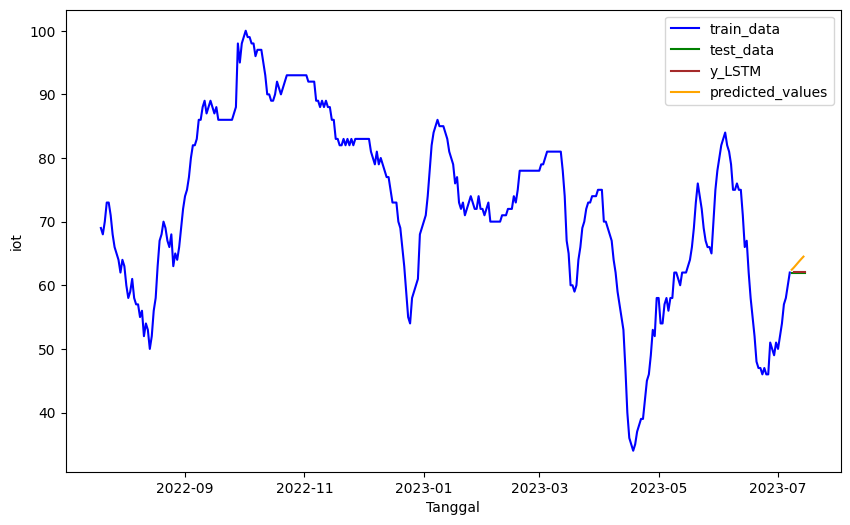

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["iot"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["iot"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_IOT, label = "y_LSTM", color = "brown")


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_iot, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("iot")
from datetime import datetime

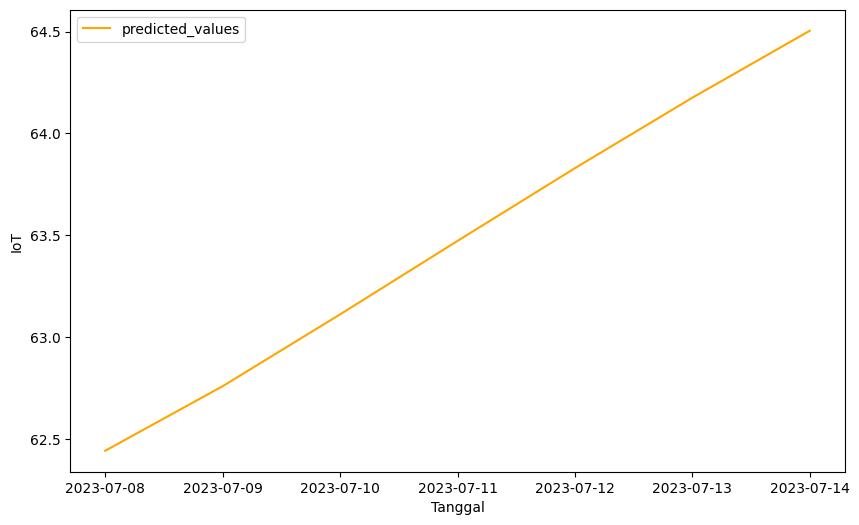

In [ ]:
plt.figure(figsize=(10,6))


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_iot, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("IoT")
from datetime import datetime

## Machine Learning

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
   #day, month, year = int(split[0]), int(split[1]), int(split[2])
   #year, month, day = int(split[0]), int(split[1]), int(split[2])
    #return datetime.datetime(year=year, month=month, day=day)
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

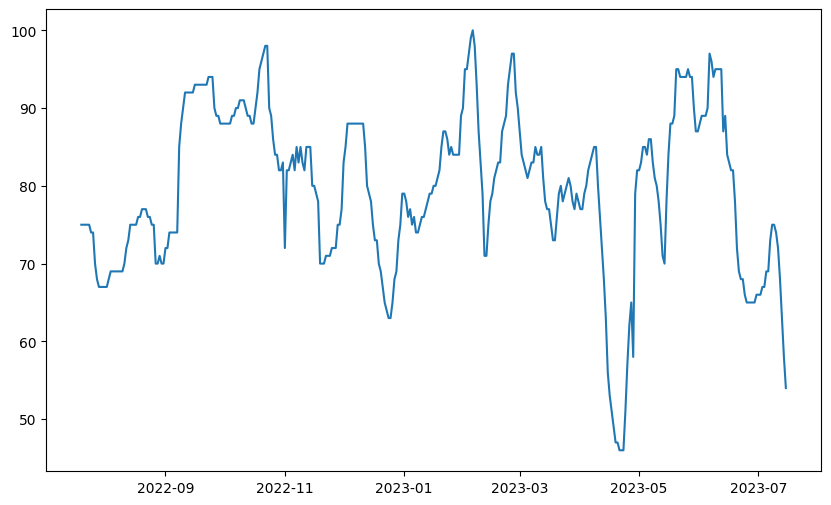

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data["Date_int"], data["machine learning"])
plt.show()

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["machine learning"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.53703704]
 [0.53703704]
 [0.53703704]
 [0.53703704]
 [0.53703704]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["machine learning"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[1.] [1.] [0.95238095] [0.85714286] [0.66666667]


In [ ]:
X_train = []
y_train = []
for i in range(5, len(scaled_train)):
    X_train.append(scaled_train[i-5:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 12:
        print(X_train)
        print(y_train)
        print()

[array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704])]
[0.5185185185185184]

[array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704]), array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.51851852])]
[0.5185185185185184, 0.5185185185185184]

[array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704]), array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.51851852]), array([0.53703704, 0.53703704, 0.53703704, 0.51851852, 0.51851852])]
[0.5185185185185184, 0.5185185185185184, 0.4444444444444444]

[array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704]), array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.51851852]), array([0.53703704, 0.53703704, 0.53703704, 0.51851852, 0.51851852]), array([0.53703704, 0.53703704, 0.51851852, 0.51851852, 0.44444444])]
[0.5185185185185184, 0.5185185185185184, 0.4444444444444444, 0.4074074074074072]

[array([0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704]), array([0.53703704, 0.5370370

In [ ]:
X_test = []
y_test = []
for i in range(1, len(scaled_test)):
    X_test.append(scaled_test[i-1:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (348, 5, 1) y_train : (348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (7, 1, 1) y_test : (7, 1)


In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

#Fitting the model
model = regressorLSTM.fit(X_train,
                         y_train,
                         validation_split = 0.3,
                         batch_size = 32,
                         epochs = 250)

regressorLSTM.summary()

Epoch 1/250
8/8 [==============================] - 4s 116ms/step - loss: 0.3610 - mae: 0.5792 - mape: 88.5506 - val_loss: 0.1976 - val_mae: 0.4025 - val_mape: 2306298.0000
Epoch 2/250
8/8 [==============================] - 0s 12ms/step - loss: 0.1324 - mae: 0.3336 - mape: 49.8694 - val_loss: 0.0324 - val_mae: 0.1521 - val_mape: 5806305.0000
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0186 - mae: 0.1096 - mape: 18.4401 - val_loss: 0.0560 - val_mae: 0.2058 - val_mape: 9058875.0000
Epoch 4/250
8/8 [==============================] - 0s 14ms/step - loss: 0.0224 - mae: 0.1225 - mape: 21.6357 - val_loss: 0.0205 - val_mae: 0.1144 - val_mape: 7143207.5000
Epoch 5/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0124 - mae: 0.0891 - mape: 13.2648 - val_loss: 0.0235 - val_mae: 0.1258 - val_mape: 6542779.5000
Epoch 6/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0117 - mae: 0.0872 - mape: 13.1917 - val_loss: 0.0209 - val_mae: 0.114

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


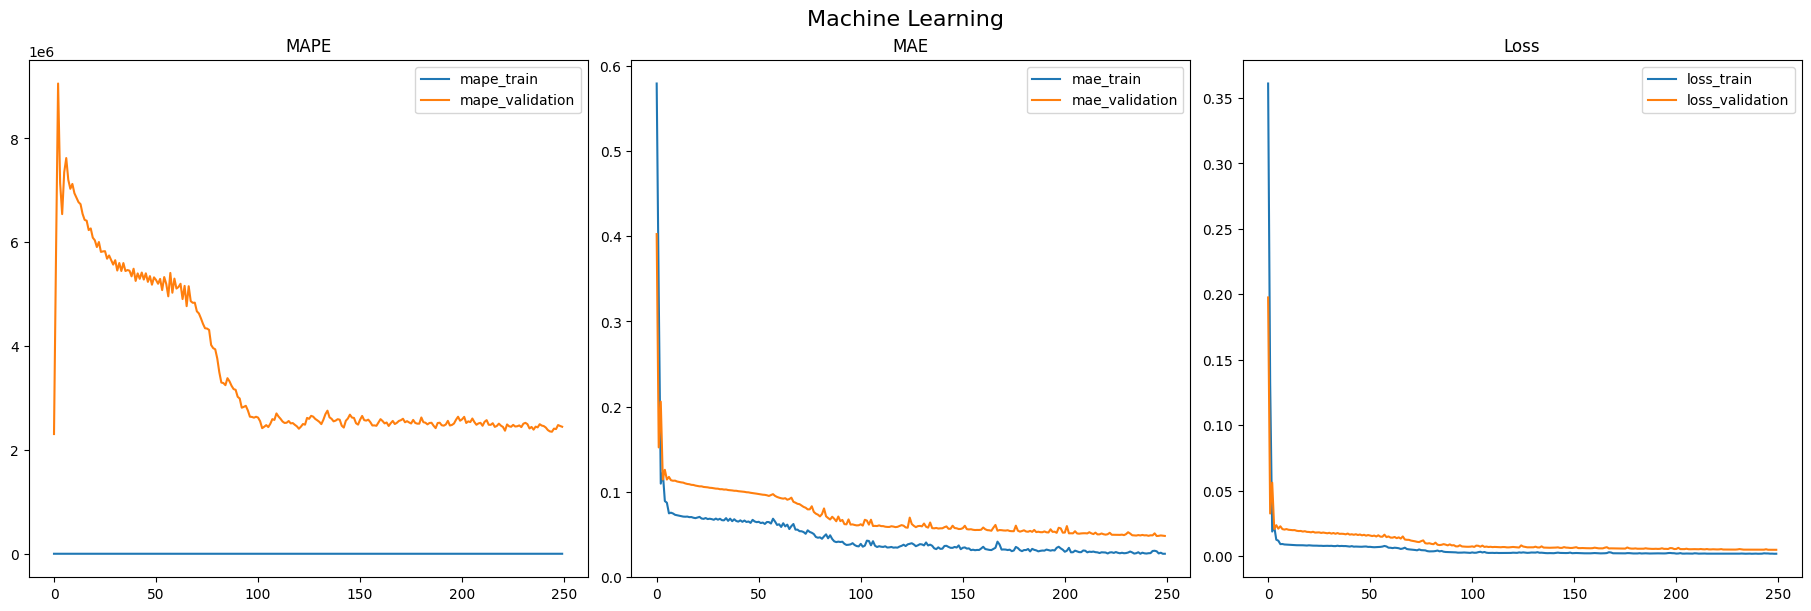

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('Machine Learning', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_ML.png')

plt.show()


In [ ]:
# Mendapatkan prediksi untuk data train dan data test
train_predicted = regressorLSTM.predict(X_train)
test_predicted = regressorLSTM.predict(X_test)

# Menghitung nilai loss (dalam hal ini, MSE) untuk data train dan data test
train_score = regressorLSTM.evaluate(X_train, y_train)
test_score = regressorLSTM.evaluate(X_test, y_test)

# Menghitung RMSE untuk data train dan data test
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

print(f"Train Score (MSE): {train_score}")
print(f"Test Score (MSE): {test_score}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")

1/1 [==============================] - 1s 695ms/step - loss: 0.1246 - mae: 0.2918 - mape: 13808179.0000
Train Score (MSE): [0.002565553644672036, 0.03337732329964638, 738275.9375]
Test Score (MSE): [0.12463001161813736, 0.29176029562950134, 13808179.0]
Train Score (RMSE): 0.05065129523068563
Test Score (RMSE): 0.3530297360156059


In [ ]:
# scaling back from 0-1 to original
y_LSTM_O_ML = scaler.inverse_transform(test_predicted)

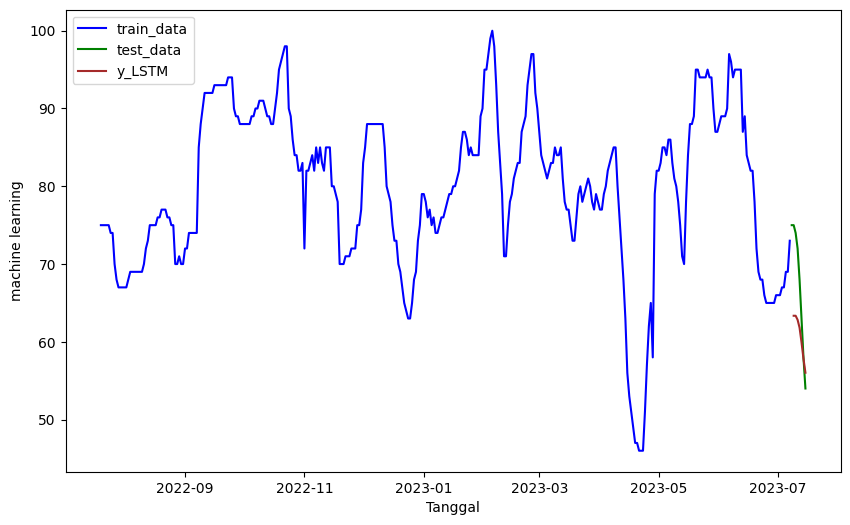

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["machine learning"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["machine learning"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_ML, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("machine learning")
plt.show()

In [ ]:
import datetime

# Mengambil 7 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_7_days = data['machine learning'] [-7:]  # Misalnya, Anda menggunakan 7 hari terakhir

# Konversi ke array numpy
last_7_days_array = last_7_days.values.reshape(-1, 1)

# Normalisasi data untuk 7 hari terakhir
last_7_days_normalized = scaler.transform(last_7_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_ml = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_7_days_normalized.reshape(1, len(last_7_days_normalized), 1)

# Memperluas model untuk memprediksi 7 hari ke depan secara berurutan
for i in range(7):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_ml.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_ml = scaler.inverse_transform(np.array(predicted_values_ml).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 7 hari ke dalam data tanggal yang terakhir
for i in range(1, 8):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 7 hari ke depan
for date, value in zip(predicted_dates, predicted_values_ml):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 18ms/step
07/08/2023: 54.80530548095703
07/09/2023: 55.282569885253906
07/10/2023: 56.030479431152344
07/11/2023: 56.814247131347656
07/12/2023: 57.51732635498047
07/13/2023: 58.15787887573242
07/14/2023: 58.770870208740234


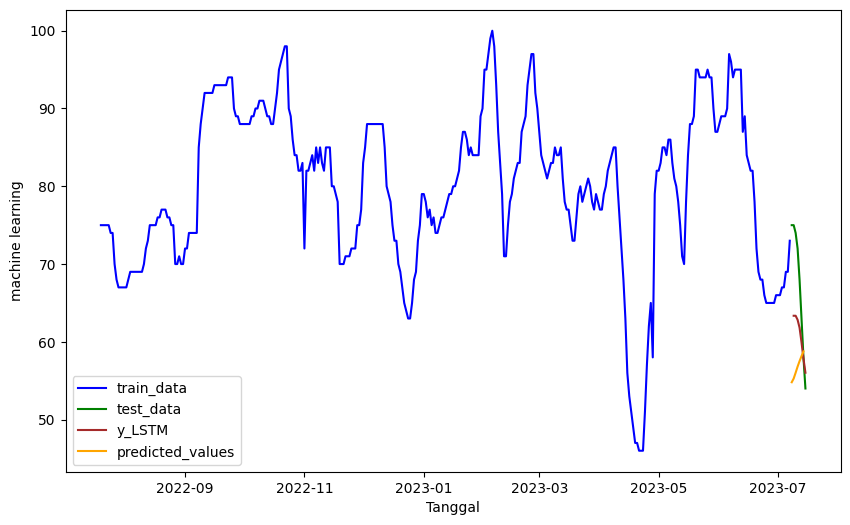

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["machine learning"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["machine learning"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_ML, label = "y_LSTM", color = "brown")


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_ml, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("machine learning")
from datetime import datetime

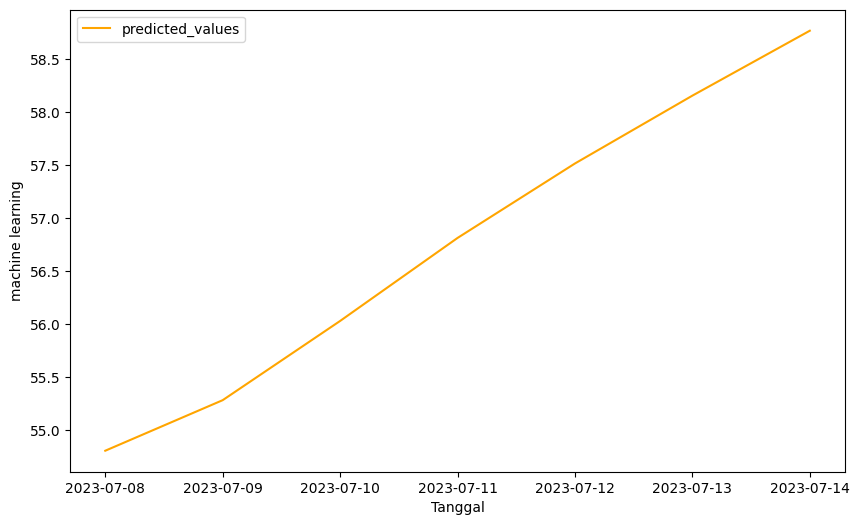

In [ ]:
plt.figure(figsize=(10,6))


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_ml, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("machine learning")
from datetime import datetime

## Bisnis Digital

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
   #day, month, year = int(split[0]), int(split[1]), int(split[2])
   #year, month, day = int(split[0]), int(split[1]), int(split[2])
    #return datetime.datetime(year=year, month=month, day=day)
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

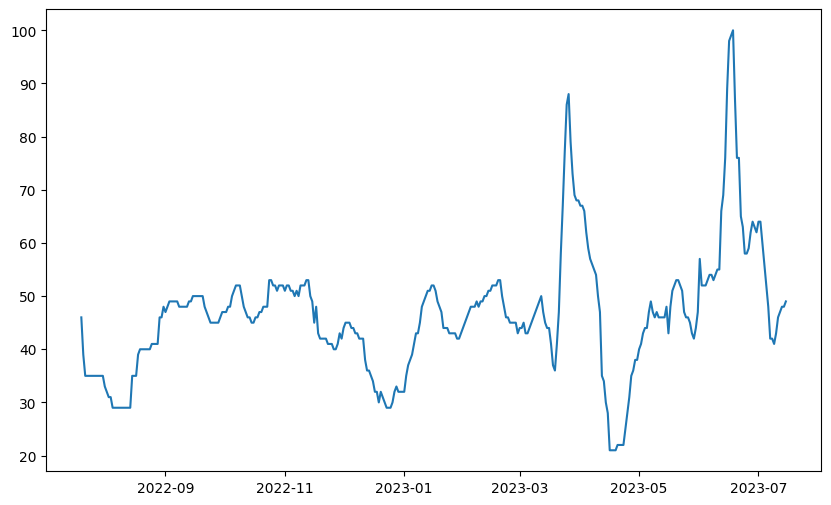

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data["Date_int"], data["bisnis digital"])
plt.show()

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["bisnis digital"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.3164557 ]
 [0.2278481 ]
 [0.17721519]
 [0.17721519]
 [0.17721519]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["bisnis digital"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.125] [0.] [0.25] [0.625] [0.75]


In [ ]:
X_train = []
y_train = []
for i in range(5, len(scaled_train)):
    X_train.append(scaled_train[i-5:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.3164557 , 0.2278481 , 0.17721519, 0.17721519, 0.17721519])]
[0.17721518987341772]

[array([0.3164557 , 0.2278481 , 0.17721519, 0.17721519, 0.17721519]), array([0.2278481 , 0.17721519, 0.17721519, 0.17721519, 0.17721519])]
[0.17721518987341772, 0.17721518987341772]

[array([0.3164557 , 0.2278481 , 0.17721519, 0.17721519, 0.17721519]), array([0.2278481 , 0.17721519, 0.17721519, 0.17721519, 0.17721519]), array([0.17721519, 0.17721519, 0.17721519, 0.17721519, 0.17721519])]
[0.17721518987341772, 0.17721518987341772, 0.17721518987341772]

[array([0.3164557 , 0.2278481 , 0.17721519, 0.17721519, 0.17721519]), array([0.2278481 , 0.17721519, 0.17721519, 0.17721519, 0.17721519]), array([0.17721519, 0.17721519, 0.17721519, 0.17721519, 0.17721519]), array([0.17721519, 0.17721519, 0.17721519, 0.17721519, 0.17721519])]
[0.17721518987341772, 0.17721518987341772, 0.17721518987341772, 0.17721518987341772]

[array([0.3164557 , 0.2278481 , 0.17721519, 0.17721519, 0.17721519]), array([0.2278481 ,

In [ ]:
X_test = []
y_test = []
for i in range(1, len(scaled_test)):
    X_test.append(scaled_test[i-1:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (348, 5, 1) y_train : (348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (7, 1, 1) y_test : (7, 1)


In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

#Fitting the model
model = regressorLSTM.fit(X_train,
                         y_train,
                         validation_split = 0.3,
                         batch_size = 32,
                         epochs = 250)

regressorLSTM.summary()

Epoch 1/250
8/8 [==============================] - 8s 242ms/step - loss: 0.0698 - mae: 0.2442 - mape: 81.2593 - val_loss: 0.0953 - val_mae: 0.2594 - val_mape: 3965570.7500
Epoch 2/250
8/8 [==============================] - 0s 22ms/step - loss: 0.0146 - mae: 0.0995 - mape: 33.7988 - val_loss: 0.0233 - val_mae: 0.1016 - val_mape: 9488688.0000
Epoch 3/250
8/8 [==============================] - 0s 24ms/step - loss: 0.0087 - mae: 0.0769 - mape: 37.8331 - val_loss: 0.0213 - val_mae: 0.0986 - val_mape: 10062685.0000
Epoch 4/250
8/8 [==============================] - 0s 27ms/step - loss: 0.0050 - mae: 0.0516 - mape: 25.5388 - val_loss: 0.0305 - val_mae: 0.1245 - val_mape: 7704252.5000
Epoch 5/250
8/8 [==============================] - 0s 31ms/step - loss: 0.0052 - mae: 0.0561 - mape: 22.5417 - val_loss: 0.0295 - val_mae: 0.1221 - val_mape: 7598587.0000
Epoch 6/250
8/8 [==============================] - 0s 21ms/step - loss: 0.0041 - mae: 0.0465 - mape: 21.4491 - val_loss: 0.0220 - val_mae: 0.09

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


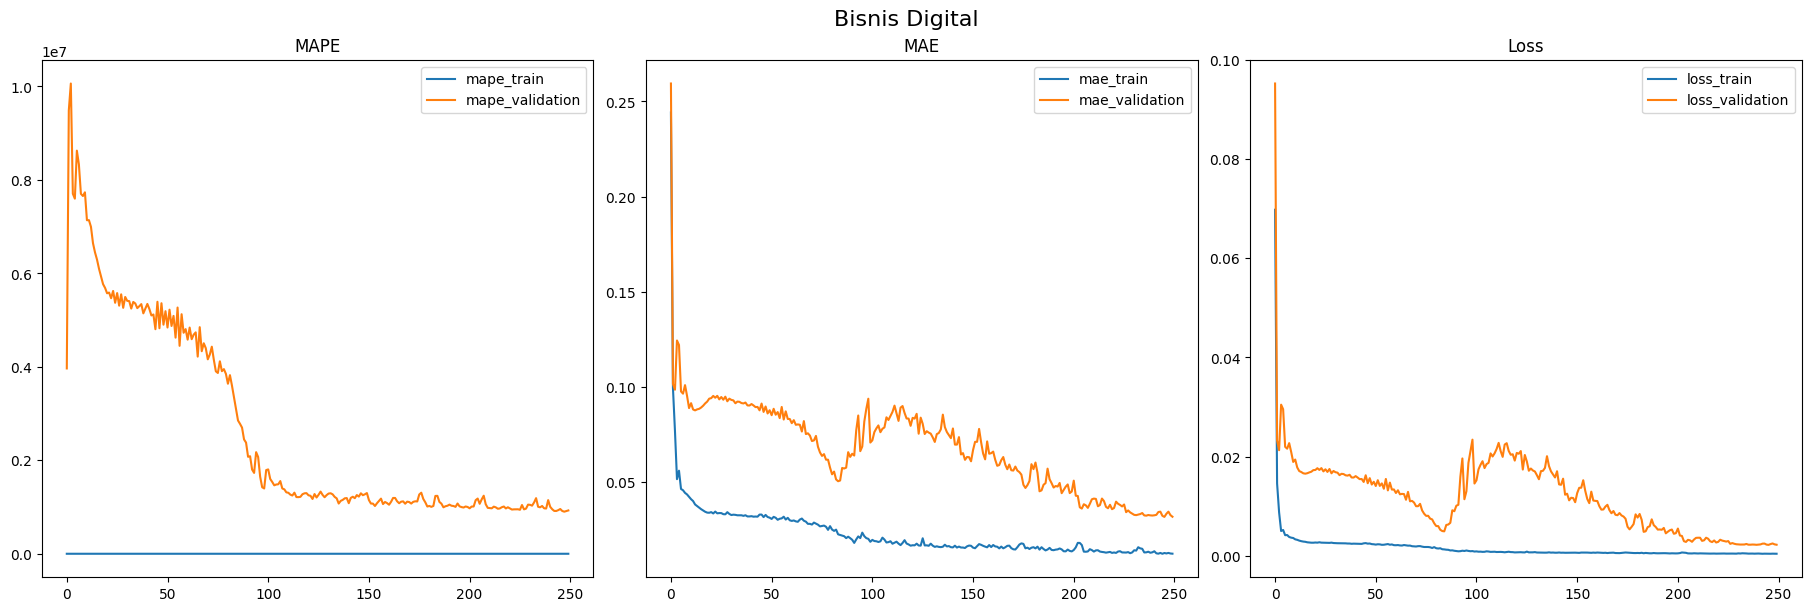

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('Bisnis Digital', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_BD.png')

plt.show()


In [ ]:
# Mendapatkan prediksi untuk data train dan data test
train_predicted = regressorLSTM.predict(X_train)
test_predicted = regressorLSTM.predict(X_test)

# Menghitung nilai loss (dalam hal ini, MSE) untuk data train dan data test
train_score = regressorLSTM.evaluate(X_train, y_train)
test_score = regressorLSTM.evaluate(X_test, y_test)

# Menghitung RMSE untuk data train dan data test
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

print(f"Train Score (MSE): {train_score}")
print(f"Test Score (MSE): {test_score}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")

1/1 [==============================] - 1s 896ms/step - loss: 0.0889 - mae: 0.2762 - mape: 11182670.0000
Train Score (MSE): [0.0009241472580470145, 0.018352067098021507, 279692.625]
Test Score (MSE): [0.08887072652578354, 0.276197612285614, 11182670.0]
Train Score (RMSE): 0.030399789716035738
Test Score (RMSE): 0.2981119372066704


In [ ]:
# scaling back from 0-1 to original
y_LSTM_O_BD = scaler.inverse_transform(test_predicted)

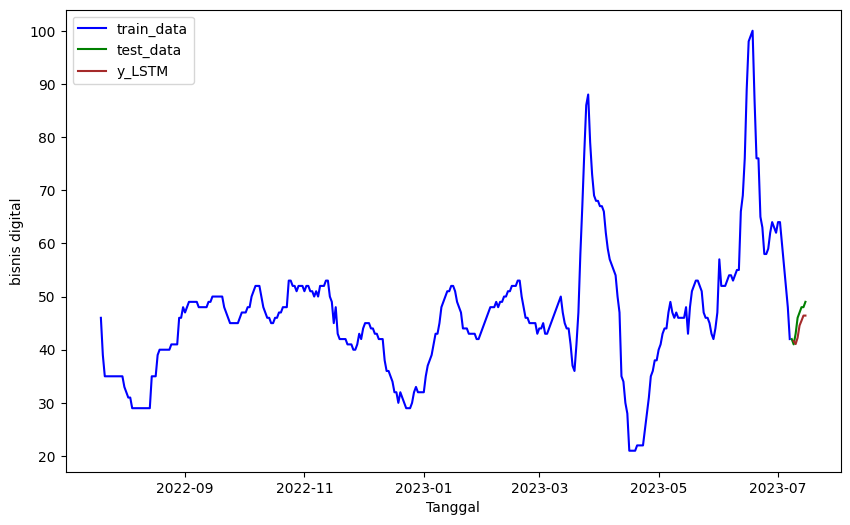

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["bisnis digital"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["bisnis digital"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_BD, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("bisnis digital")
plt.show()

In [ ]:
import datetime

# Mengambil 7 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_7_days = data['bisnis digital'] [-7:]  # Misalnya, Anda menggunakan 7 hari terakhir

# Konversi ke array numpy
last_7_days_array = last_7_days.values.reshape(-1, 1)

# Normalisasi data untuk 7 hari terakhir
last_7_days_normalized = scaler.transform(last_7_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_bd = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_7_days_normalized.reshape(1, len(last_7_days_normalized), 1)

# Memperluas model untuk memprediksi 7 hari ke depan secara berurutan
for i in range(7):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_bd.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_bd = scaler.inverse_transform(np.array(predicted_values_bd).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 7 hari ke dalam data tanggal yang terakhir
for i in range(1, 8):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 7 hari ke depan
for date, value in zip(predicted_dates, predicted_values_bd):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 24ms/step
07/08/2023: 49.89202117919922
07/09/2023: 51.050662994384766
07/10/2023: 52.560081481933594
07/11/2023: 54.599666595458984
07/12/2023: 57.25468826293945
07/13/2023: 60.2897834777832
07/14/2023: 62.88072967529297


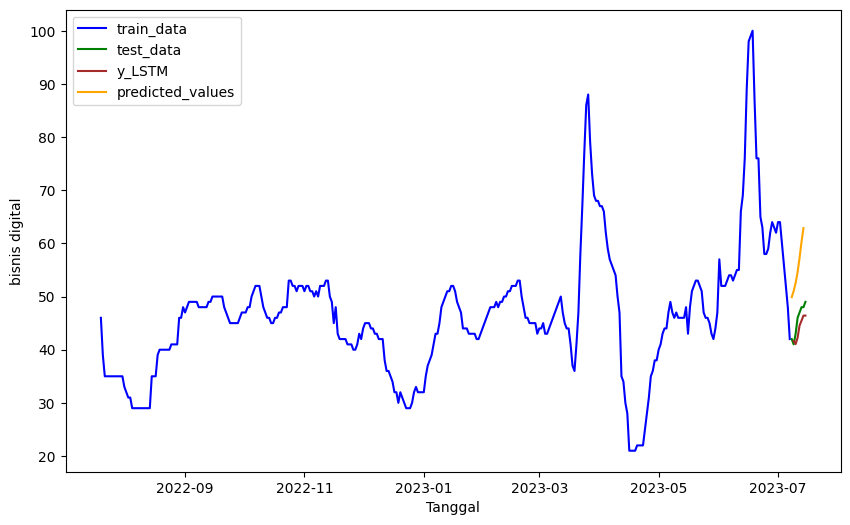

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["bisnis digital"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["bisnis digital"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_BD, label = "y_LSTM", color = "brown")


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_bd, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("bisnis digital")
from datetime import datetime

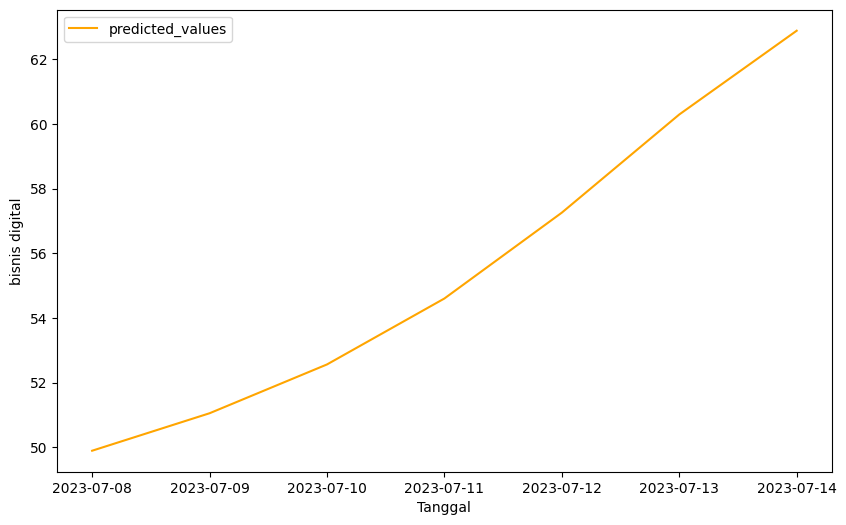

In [ ]:
plt.figure(figsize=(10,6))


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_bd, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("bisnis digital")
from datetime import datetime

## Kecerdasan Buatan

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
   #day, month, year = int(split[0]), int(split[1]), int(split[2])
   #year, month, day = int(split[0]), int(split[1]), int(split[2])
    #return datetime.datetime(year=year, month=month, day=day)
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

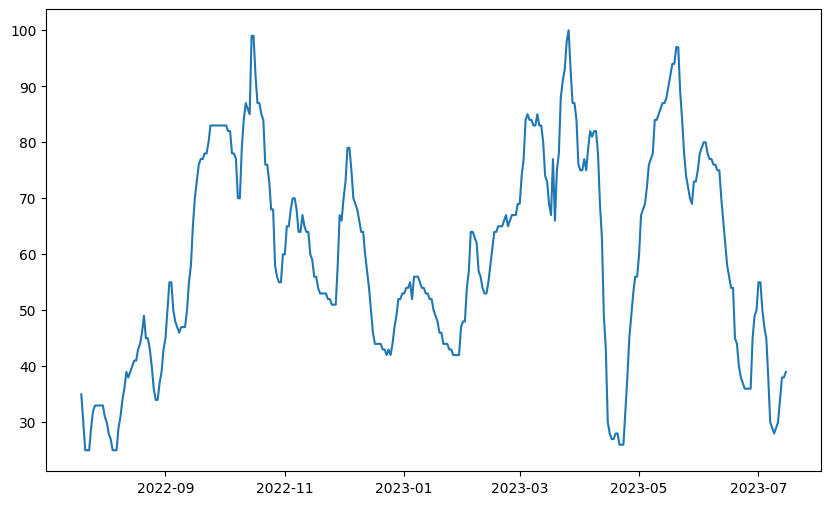

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data["Date_int"], data["kecerdasan buatan"])
plt.show()

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["kecerdasan buatan"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.13333333]
 [0.06666667]
 [0.        ]
 [0.        ]
 [0.        ]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["kecerdasan buatan"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.09090909] [0.] [0.09090909] [0.18181818] [0.54545455]


In [ ]:
X_train = []
y_train = []
for i in range(5, len(scaled_train)):
    X_train.append(scaled_train[i-5:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.13333333, 0.06666667, 0.        , 0.        , 0.        ])]
[0.053333333333333344]

[array([0.13333333, 0.06666667, 0.        , 0.        , 0.        ]), array([0.06666667, 0.        , 0.        , 0.        , 0.05333333])]
[0.053333333333333344, 0.09333333333333332]

[array([0.13333333, 0.06666667, 0.        , 0.        , 0.        ]), array([0.06666667, 0.        , 0.        , 0.        , 0.05333333]), array([0.        , 0.        , 0.        , 0.05333333, 0.09333333])]
[0.053333333333333344, 0.09333333333333332, 0.10666666666666663]

[array([0.13333333, 0.06666667, 0.        , 0.        , 0.        ]), array([0.06666667, 0.        , 0.        , 0.        , 0.05333333]), array([0.        , 0.        , 0.        , 0.05333333, 0.09333333]), array([0.        , 0.        , 0.05333333, 0.09333333, 0.10666667])]
[0.053333333333333344, 0.09333333333333332, 0.10666666666666663, 0.10666666666666663]

[array([0.13333333, 0.06666667, 0.        , 0.        , 0.        ]), array([0.06666

In [ ]:
X_test = []
y_test = []
for i in range(1, len(scaled_test)):
    X_test.append(scaled_test[i-1:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (348, 5, 1) y_train : (348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (7, 1, 1) y_test : (7, 1)


In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

#Fitting the model
model = regressorLSTM.fit(X_train,
                         y_train,
                         validation_split = 0.3,
                         batch_size = 32,
                         epochs = 250)

regressorLSTM.summary()

Epoch 1/250
8/8 [==============================] - 7s 312ms/step - loss: 0.1582 - mae: 0.3473 - mape: 281850.2188 - val_loss: 0.1100 - val_mae: 0.2852 - val_mape: 82.4169
Epoch 2/250
8/8 [==============================] - 0s 37ms/step - loss: 0.0366 - mae: 0.1499 - mape: 2553726.2500 - val_loss: 0.0272 - val_mae: 0.1262 - val_mape: 135.3089
Epoch 3/250
8/8 [==============================] - 0s 25ms/step - loss: 0.0240 - mae: 0.1350 - mape: 3297472.0000 - val_loss: 0.0298 - val_mae: 0.1291 - val_mape: 137.6632
Epoch 4/250
8/8 [==============================] - 0s 39ms/step - loss: 0.0130 - mae: 0.0947 - mape: 2437428.2500 - val_loss: 0.0272 - val_mae: 0.1423 - val_mape: 101.7236
Epoch 5/250
8/8 [==============================] - 0s 47ms/step - loss: 0.0140 - mae: 0.0913 - mape: 2177708.7500 - val_loss: 0.0231 - val_mae: 0.1303 - val_mape: 103.0766
Epoch 6/250
8/8 [==============================] - 0s 55ms/step - loss: 0.0099 - mae: 0.0822 - mape: 2373943.2500 - val_loss: 0.0225 - val_ma

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


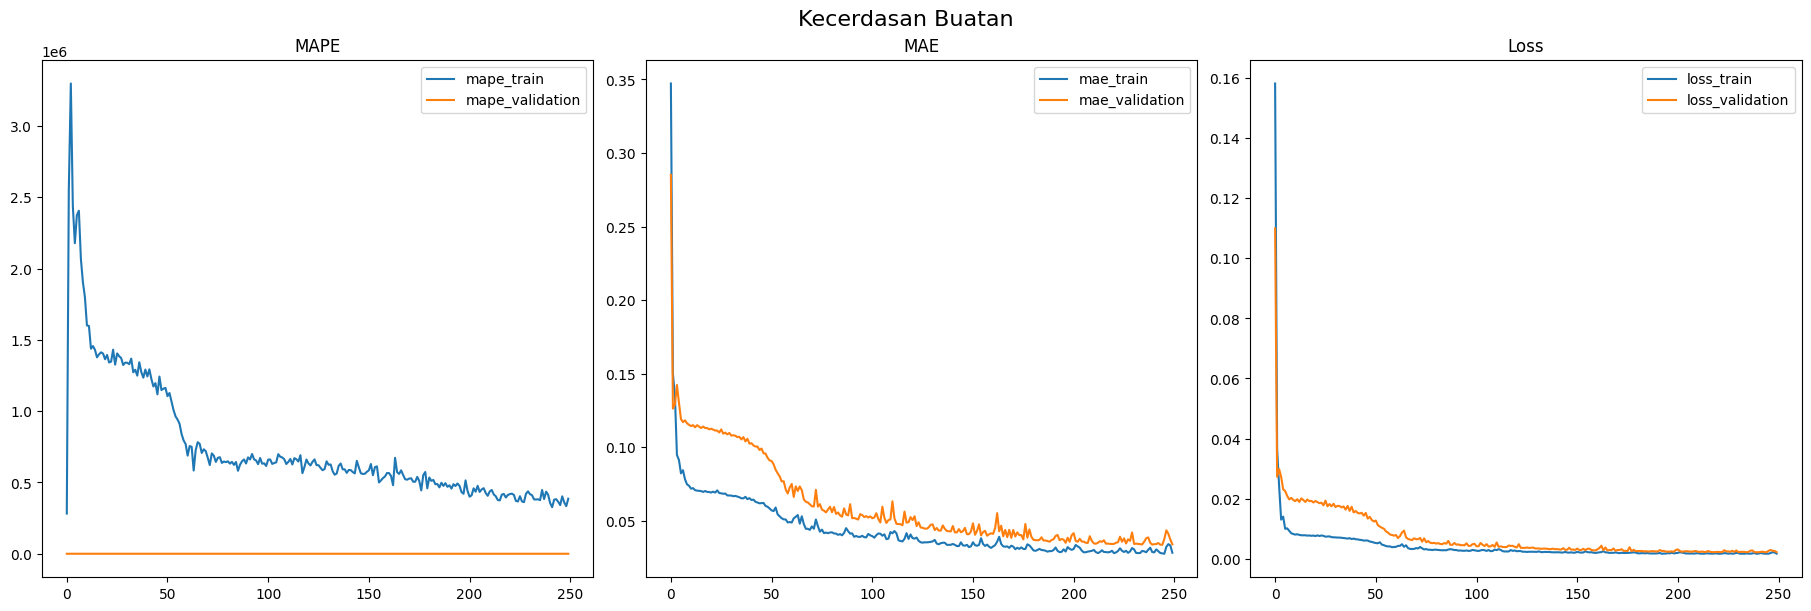

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('Kecerdasan Buatan', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_KB.png')

plt.show()


In [ ]:
# Mendapatkan prediksi untuk data train dan data test
train_predicted = regressorLSTM.predict(X_train)
test_predicted = regressorLSTM.predict(X_test)

# Menghitung nilai loss (dalam hal ini, MSE) untuk data train dan data test
train_score = regressorLSTM.evaluate(X_train, y_train)
test_score = regressorLSTM.evaluate(X_test, y_test)

# Menghitung RMSE untuk data train dan data test
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

print(f"Train Score (MSE): {train_score}")
print(f"Test Score (MSE): {test_score}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")

1/1 [==============================] - 1s 886ms/step - loss: 0.1008 - mae: 0.2633 - mape: 13057567.0000
Train Score (MSE): [0.001767798443324864, 0.029600540176033974, 280189.53125]
Test Score (MSE): [0.10075092315673828, 0.26334118843078613, 13057567.0]
Train Score (RMSE): 0.04204519300616596
Test Score (RMSE): 0.31741283709880846


In [ ]:
# scaling back from 0-1 to original
y_LSTM_O_KB = scaler.inverse_transform(test_predicted)

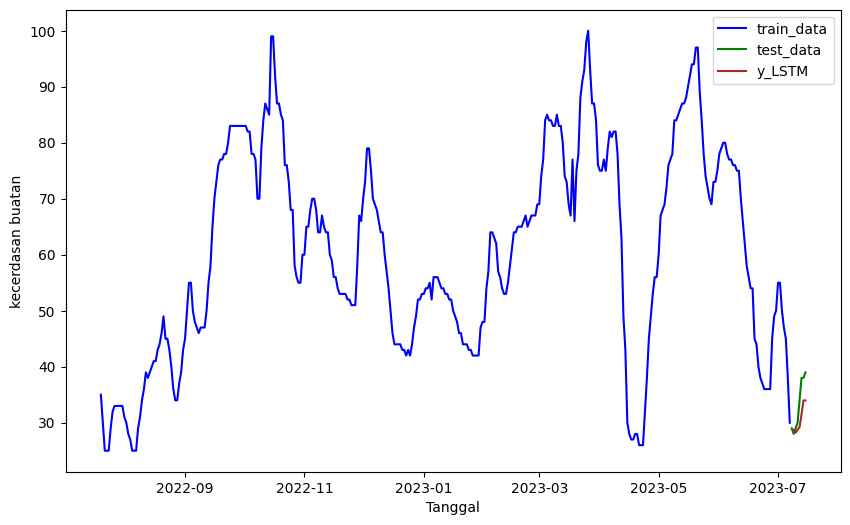

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["kecerdasan buatan"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["kecerdasan buatan"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_KB, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("kecerdasan buatan")
plt.show()

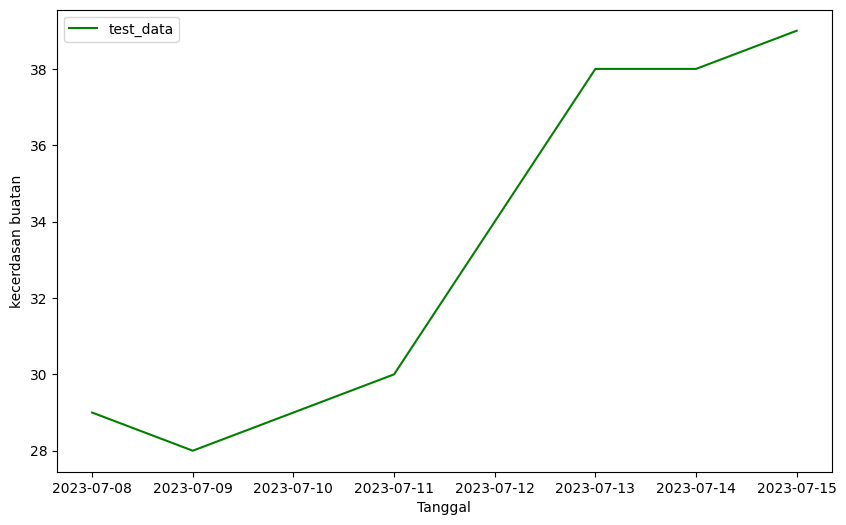

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_data["Date_int"], test_data["kecerdasan buatan"], label = "test_data", color = "g")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("kecerdasan buatan")
plt.show()

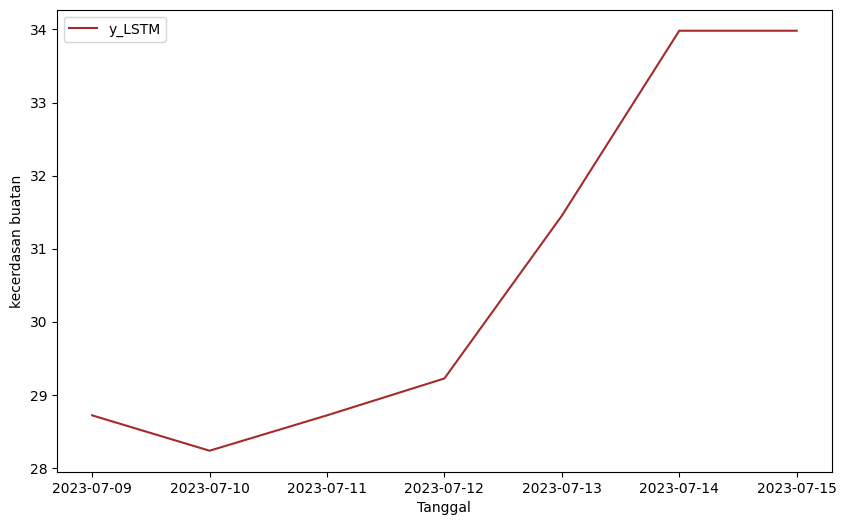

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_KB, label = "y_LSTM", color = "brown")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("kecerdasan buatan")
plt.show()

In [ ]:
import datetime

# Mengambil 7 hari terakhir dari data yang ada sebagai data input untuk prediksi
last_7_days = data['kecerdasan buatan'] [-7:]  # Misalnya, Anda menggunakan 7 hari terakhir

# Konversi ke array numpy
last_7_days_array = last_7_days.values.reshape(-1, 1)

# Normalisasi data untuk 7 hari terakhir
last_7_days_normalized = scaler.transform(last_7_days_array)

# Inisialisasi variabel untuk menyimpan prediksi
predicted_values_kb = []

# Reshape data menjadi format yang sesuai untuk LSTM (batch_size, timesteps, features)
input_data = last_7_days_normalized.reshape(1, len(last_7_days_normalized), 1)

# Memperluas model untuk memprediksi 7 hari ke depan secara berurutan
for i in range(7):
    # Melakukan prediksi untuk 1 hari ke depan
    next_day_prediction_normalized = regressorLSTM.predict(input_data)

    # Mengumpulkan nilai prediksi untuk hari berikutnya
    predicted_values_kb.append(next_day_prediction_normalized[0, 0])

    # Memperbarui data untuk prediksi hari berikutnya
    input_data = np.append(input_data[:, 1:, :], next_day_prediction_normalized.reshape(1, 1, 1), axis=1)

# Mengembalikan prediksi ke skala asli
predicted_values_kb = scaler.inverse_transform(np.array(predicted_values_kb).reshape(-1, 1))

# Mengambil tanggal terakhir dalam data Anda
last_date = datetime.datetime.strptime('07/07/2023', '%m/%d/%Y')

# Inisialisasi variabel untuk menyimpan prediksi
predicted_dates = []

# Menambahkan 7 hari ke dalam data tanggal yang terakhir
for i in range(1, 8):
    next_date = last_date + timedelta(days=i)
    predicted_dates.append(next_date)

# Menampilkan hasil prediksi 7 hari ke depan
for date, value in zip(predicted_dates, predicted_values_kb):
    print(f"{date.strftime('%m/%d/%Y')}: {value[0]}")

1/1 [==============================] - 0s 18ms/step
07/08/2023: 39.57180404663086
07/09/2023: 39.74665069580078
07/10/2023: 39.73664855957031
07/11/2023: 39.73248291015625
07/12/2023: 39.81898880004883
07/13/2023: 39.9813346862793
07/14/2023: 40.19099044799805


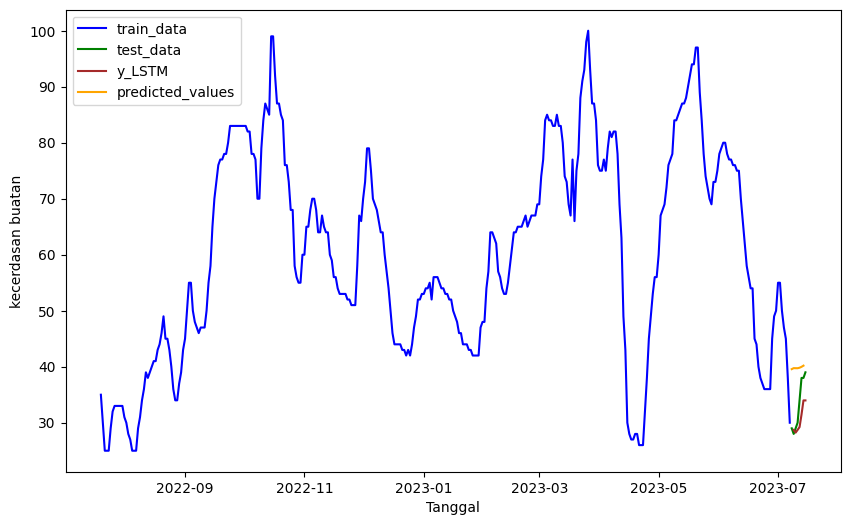

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data["Date_int"], train_data["kecerdasan buatan"], label = "train_data", color = "b")
plt.plot(test_data["Date_int"], test_data["kecerdasan buatan"], label = "test_data", color = "g")
plt.plot(test_data["Date_int"].iloc[1:], y_LSTM_O_KB, label = "y_LSTM", color = "brown")


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_kb, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("kecerdasan buatan")
from datetime import datetime

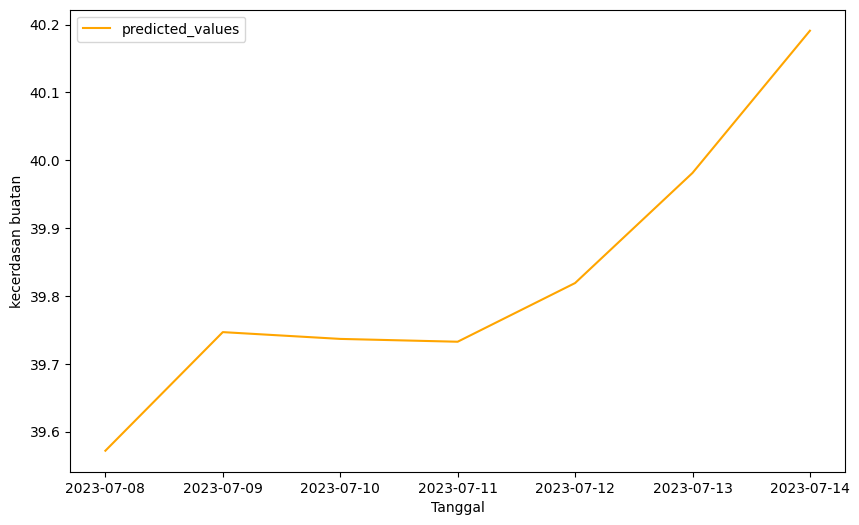

In [ ]:
plt.figure(figsize=(10,6))


# Menambahkan garis prediksi untuk data prediksi
plt.plot(predicted_dates, predicted_values_kb, label="predicted_values", color="orange")

plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("kecerdasan buatan")
from datetime import datetime

## Menggabungkan Hasil Plot

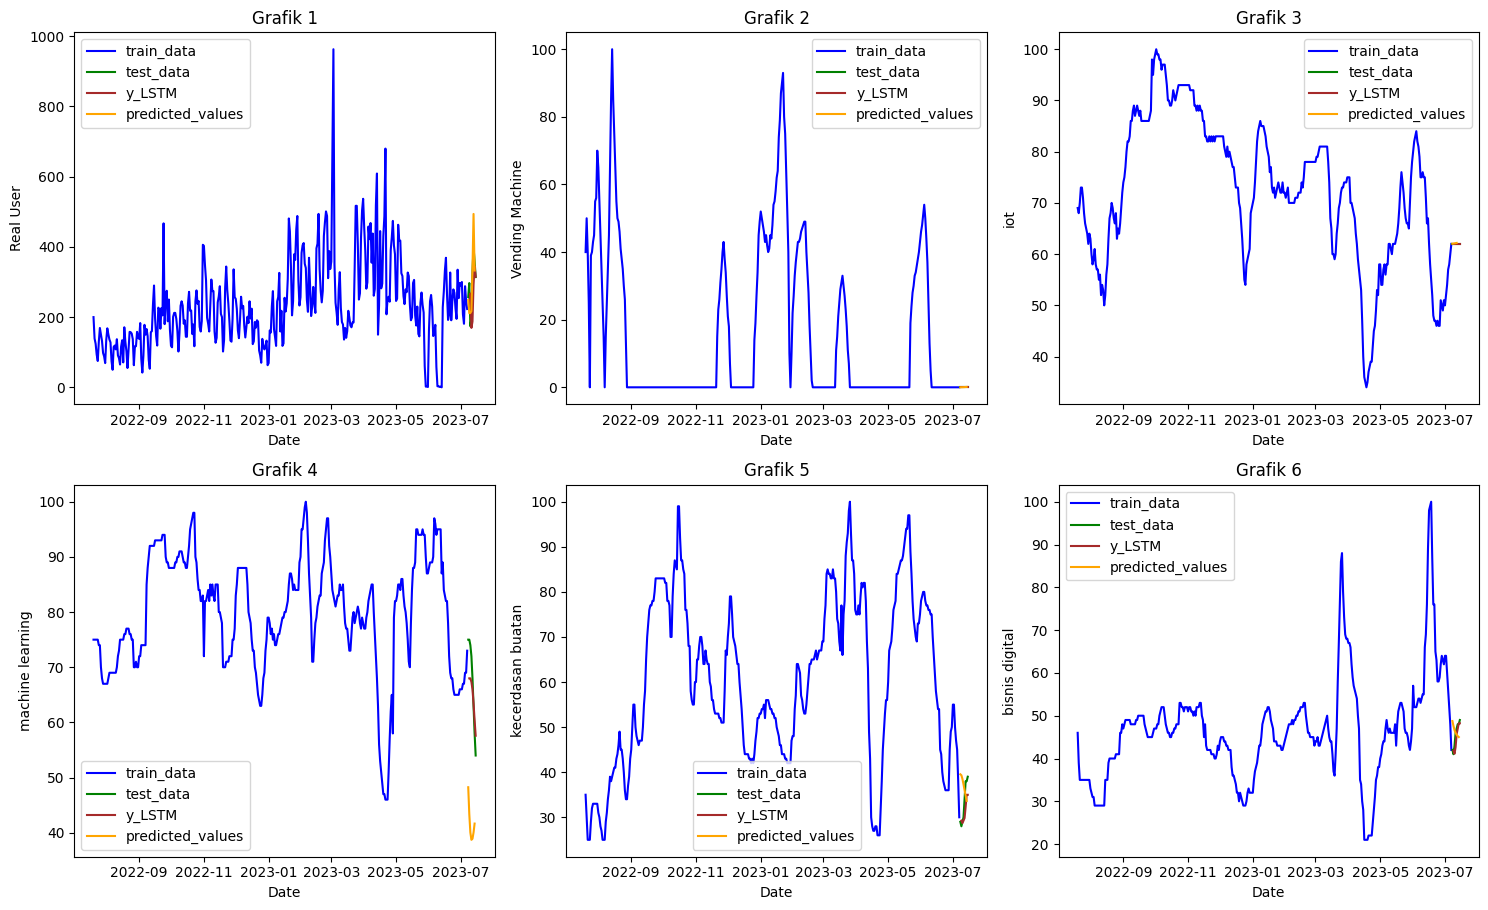

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Your existing code for the 'forecast' function and data preparation

# Set the figure size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figsize as needed

# Plot for Visitor
axs[0, 0].plot(train_data["Date_int"], train_data["Real User"], label = "train_data", color = "b")
axs[0, 0].plot(test_data["Date_int"], test_data["Real User"], label = "test_data", color = "g")
axs[0, 0].plot(test_data["Date_int"].iloc[1:], y_LSTM_O_RU, label = "y_LSTM", color = "brown")
axs[0, 0].plot(predicted_dates, predicted_values_ru, label="predicted_values", color="orange")
axs[0, 0].set(xlabel='Date', ylabel='Real User', title='Grafik 1')
axs[0, 0].legend()

# Plot for Vending Machine
axs[0, 1].plot(train_data["Date_int"], train_data["vending machine"], label = "train_data", color = "b")
axs[0, 1].plot(test_data["Date_int"], test_data["vending machine"], label = "test_data", color = "g")
axs[0, 1].plot(test_data["Date_int"].iloc[1:], y_LSTM_O_VM, label = "y_LSTM", color = "brown")
axs[0, 1].plot(predicted_dates, predicted_values_vm, label="predicted_values", color="orange")
axs[0, 1].set(xlabel='Date', ylabel='Vending Machine', title='Grafik 2')
axs[0, 1].legend()

# Plot for IoT
axs[0, 2].plot(train_data["Date_int"], train_data["iot"], label = "train_data", color = "b")
axs[0, 2].plot(test_data["Date_int"], test_data["iot"], label = "test_data", color = "g")
axs[0, 2].plot(test_data["Date_int"].iloc[1:], y_LSTM_O_IOT, label = "y_LSTM", color = "brown")
axs[0, 2].plot(predicted_dates[:5], np.ravel(predicted_values_iot), label="predicted_values", color="orange")
axs[0, 2].set(xlabel='Date', ylabel='iot', title='Grafik 3')
axs[0, 2].legend()

# Plot for Machine Learning
axs[1, 0].plot(train_data["Date_int"], train_data["machine learning"], label = "train_data", color = "b")
axs[1, 0].plot(test_data["Date_int"], test_data["machine learning"], label = "test_data", color = "g")
axs[1, 0].plot(test_data["Date_int"].iloc[1:], y_LSTM_O_ML, label = "y_LSTM", color = "brown")
axs[1, 0].plot(predicted_dates, predicted_values_ml, label="predicted_values", color="orange")
axs[1, 0].set(xlabel='Date', ylabel='machine learning', title='Grafik 4')
axs[1, 0].legend()

# Plot for Kecerdasan Buatan
axs[1, 1].plot(train_data["Date_int"], train_data["kecerdasan buatan"], label = "train_data", color = "b")
axs[1, 1].plot(test_data["Date_int"], test_data["kecerdasan buatan"], label = "test_data", color = "g")
axs[1, 1].plot(test_data["Date_int"].iloc[1:], y_LSTM_O_KB, label = "y_LSTM", color = "brown")
axs[1, 1].plot(predicted_dates, predicted_values_kb, label="predicted_values", color="orange")
axs[1, 1].set(xlabel='Date', ylabel='kecerdasan buatan', title='Grafik 5')
axs[1, 1].legend()

# Plot for Bisnis Digital
axs[1, 2].plot(train_data["Date_int"], train_data["bisnis digital"], label = "train_data", color = "b")
axs[1, 2].plot(test_data["Date_int"], test_data["bisnis digital"], label = "test_data", color = "g")
axs[1, 2].plot(test_data["Date_int"].iloc[1:], y_LSTM_O_BD, label = "y_LSTM", color = "brown")
axs[1, 2].plot(predicted_dates, predicted_values_bd, label="predicted_values", color="orange")
axs[1, 2].set(xlabel='Date', ylabel='bisnis digital', title='Grafik 6')
axs[1, 2].legend()

# Adjust layout for better visualization and enlarge the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot
plt.savefig('combined_forecast_plots_1.png')

# Show the plot
plt.show()

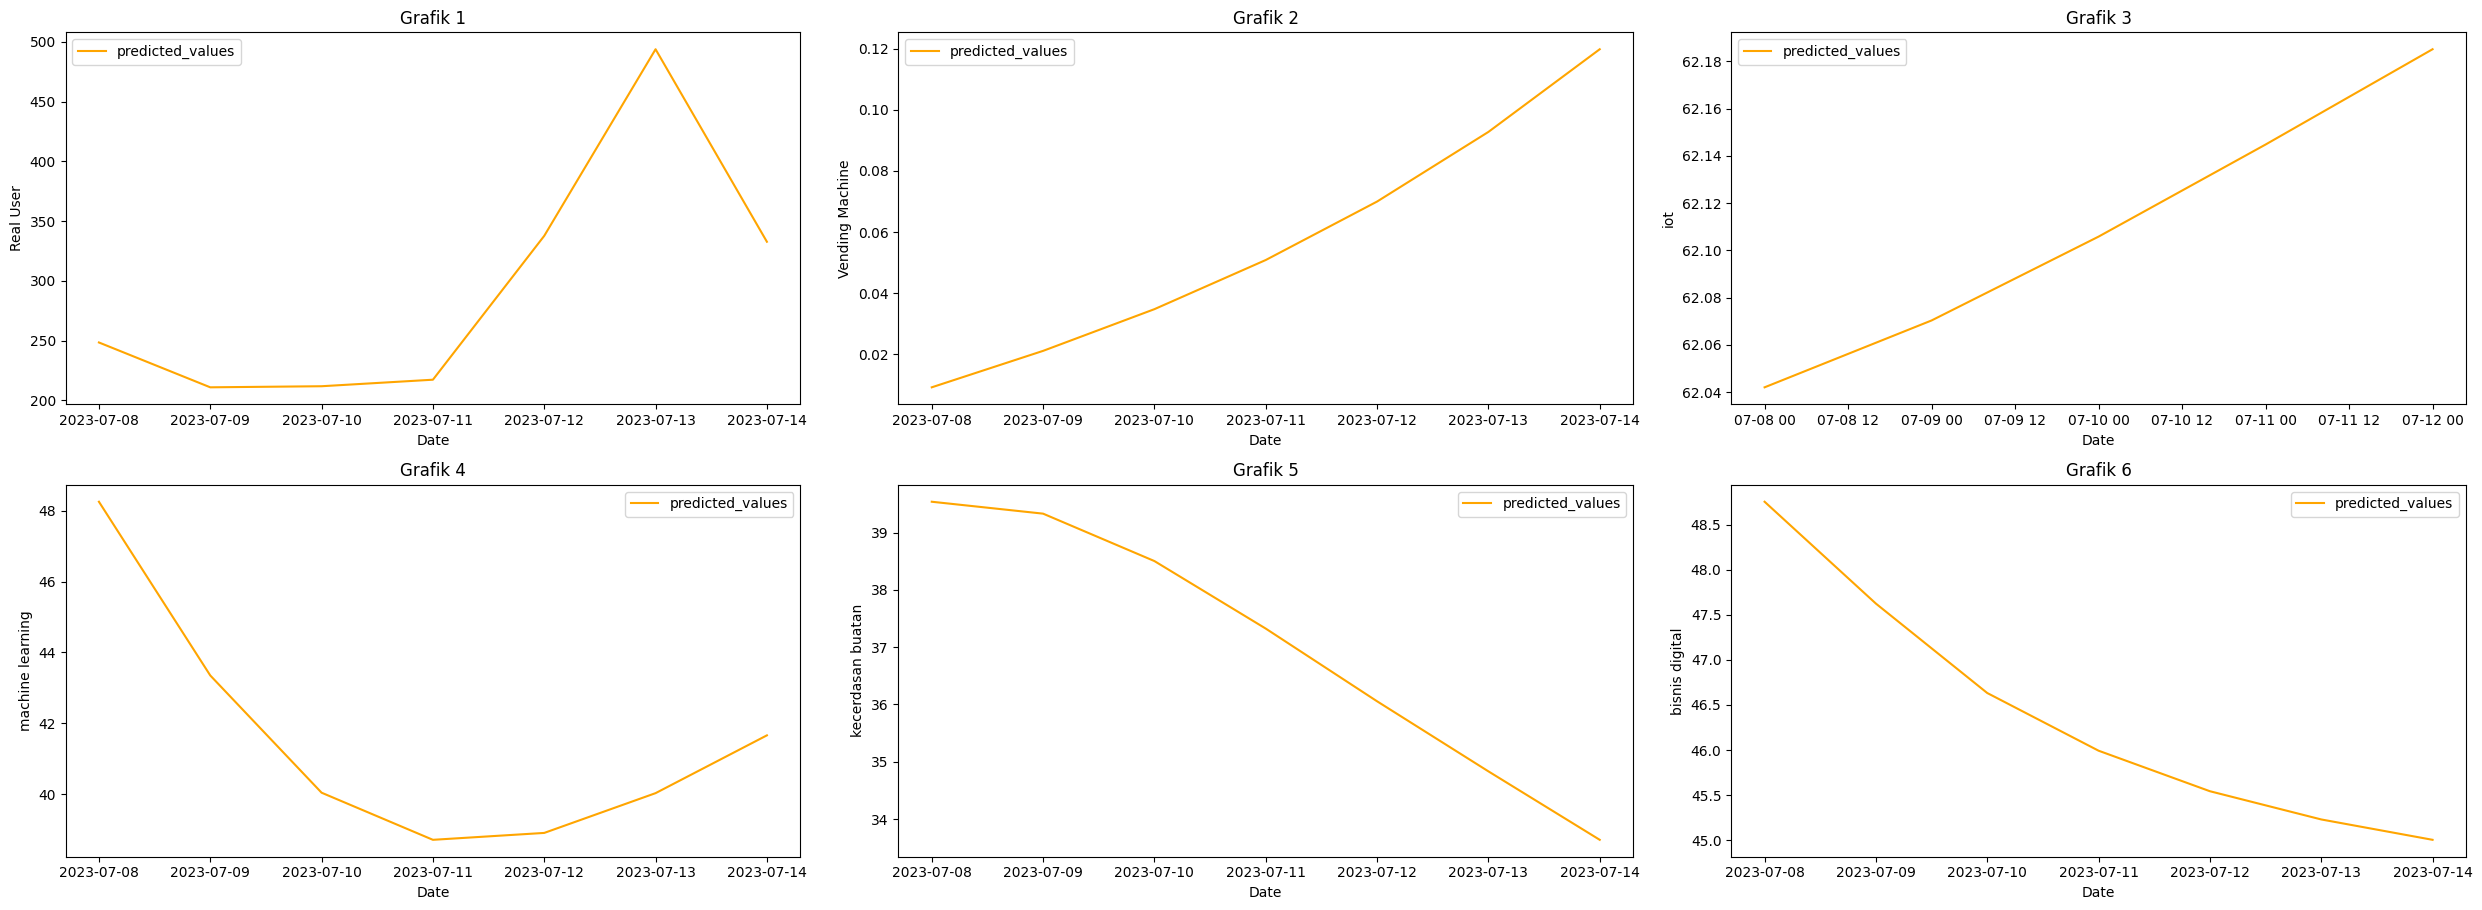

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Your existing code for the 'forecast' function and data preparation

# Set the figure size
fig, axs = plt.subplots(2, 3, figsize=(25, 10))  # Adjust the figsize as needed

# Plot for Visitor
axs[0, 0].plot(predicted_dates, predicted_values_ru, label="predicted_values", color="orange")
axs[0, 0].set(xlabel='Date', ylabel='Real User', title='Grafik 1')
axs[0, 0].legend()

# Plot for Vending Machine
axs[0, 1].plot(predicted_dates, predicted_values_vm, label="predicted_values", color="orange")
axs[0, 1].set(xlabel='Date', ylabel='Vending Machine', title='Grafik 2')
axs[0, 1].legend()

# Plot for IoT
axs[0, 2].plot(predicted_dates[:5], np.ravel(predicted_values_iot), label="predicted_values", color="orange")
axs[0, 2].set(xlabel='Date', ylabel='iot', title='Grafik 3')
axs[0, 2].legend()

# Plot for Machine Learning
axs[1, 0].plot(predicted_dates, predicted_values_ml, label="predicted_values", color="orange")
axs[1, 0].set(xlabel='Date', ylabel='machine learning', title='Grafik 4')
axs[1, 0].legend()

# Plot for Kecerdasan Buatan
axs[1, 1].plot(predicted_dates, predicted_values_kb, label="predicted_values", color="orange")
axs[1, 1].set(xlabel='Date', ylabel='kecerdasan buatan', title='Grafik 5')
axs[1, 1].legend()

# Plot for Bisnis Digital
axs[1, 2].plot(predicted_dates, predicted_values_bd, label="predicted_values", color="orange")
axs[1, 2].set(xlabel='Date', ylabel='bisnis digital', title='Grafik 6')
axs[1, 2].legend()

# Adjust layout for better visualization and enlarge the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot
plt.savefig('combined_forecast_plots_2.png')

# Show the plot
plt.show()

## Menggabungkan Plot Menjadi satu plot

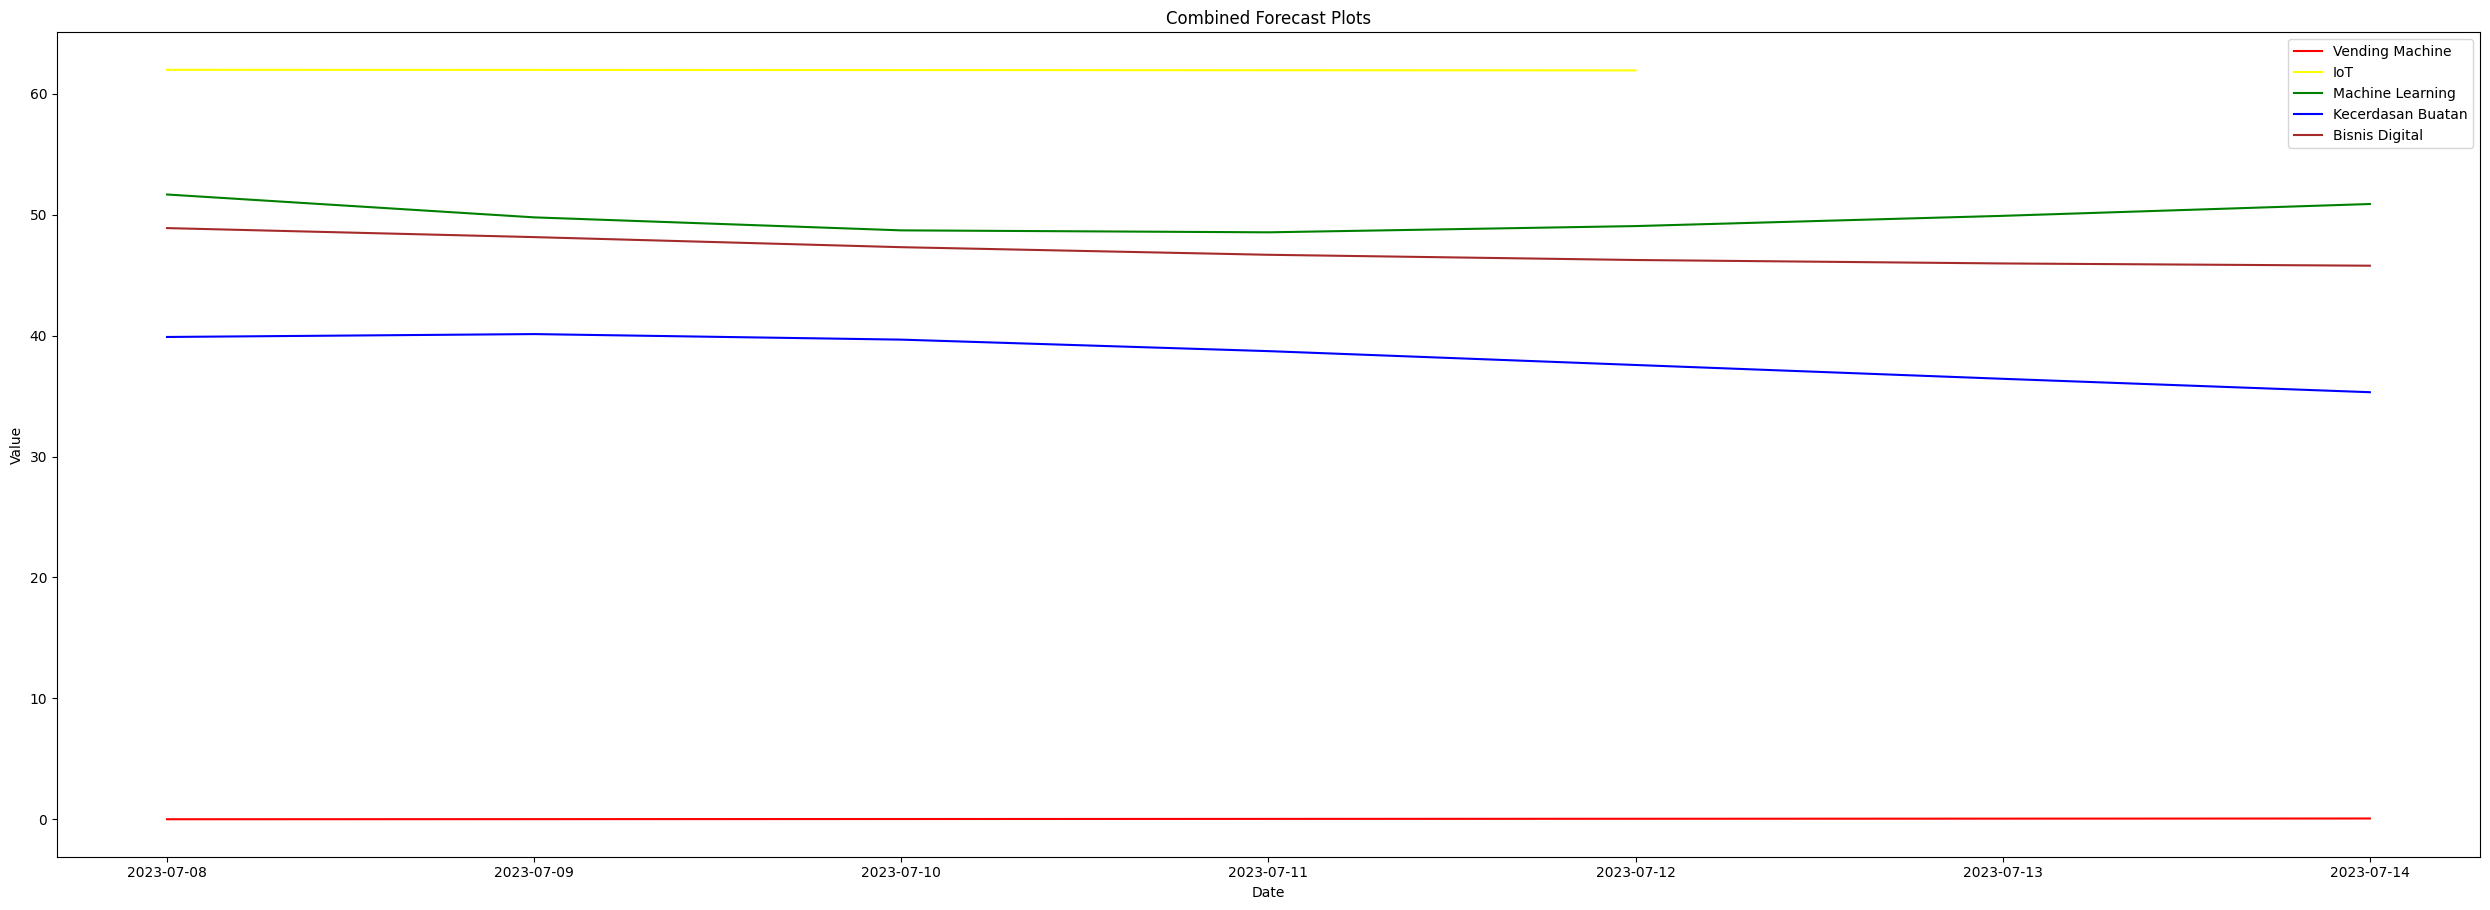

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Your existing code for the 'forecast' function and data preparation

# Set the figure size
fig, ax = plt.subplots(figsize=(25, 10))  # Adjust the figsize as needed

# Plot for Vending Machine
ax.plot(predicted_dates, predicted_values_vm, label="Vending Machine", color="red")

# Plot for IoT
ax.plot(predicted_dates[:5], np.ravel(predicted_values_iot), label="IoT", color="yellow")

# Plot for Machine Learning
ax.plot(predicted_dates, predicted_values_ml, label="Machine Learning", color="green")

# Plot for Kecerdasan Buatan
ax.plot(predicted_dates, predicted_values_kb, label="Kecerdasan Buatan", color="blue")

# Plot for Bisnis Digital
ax.plot(predicted_dates, predicted_values_bd, label="Bisnis Digital", color="brown")

# Set labels and title
ax.set(xlabel='Date', ylabel='Value', title='Combined Forecast Plots')
ax.legend()

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot
plt.savefig('combined_forecast_plots.png')

# Show the plot
plt.show()


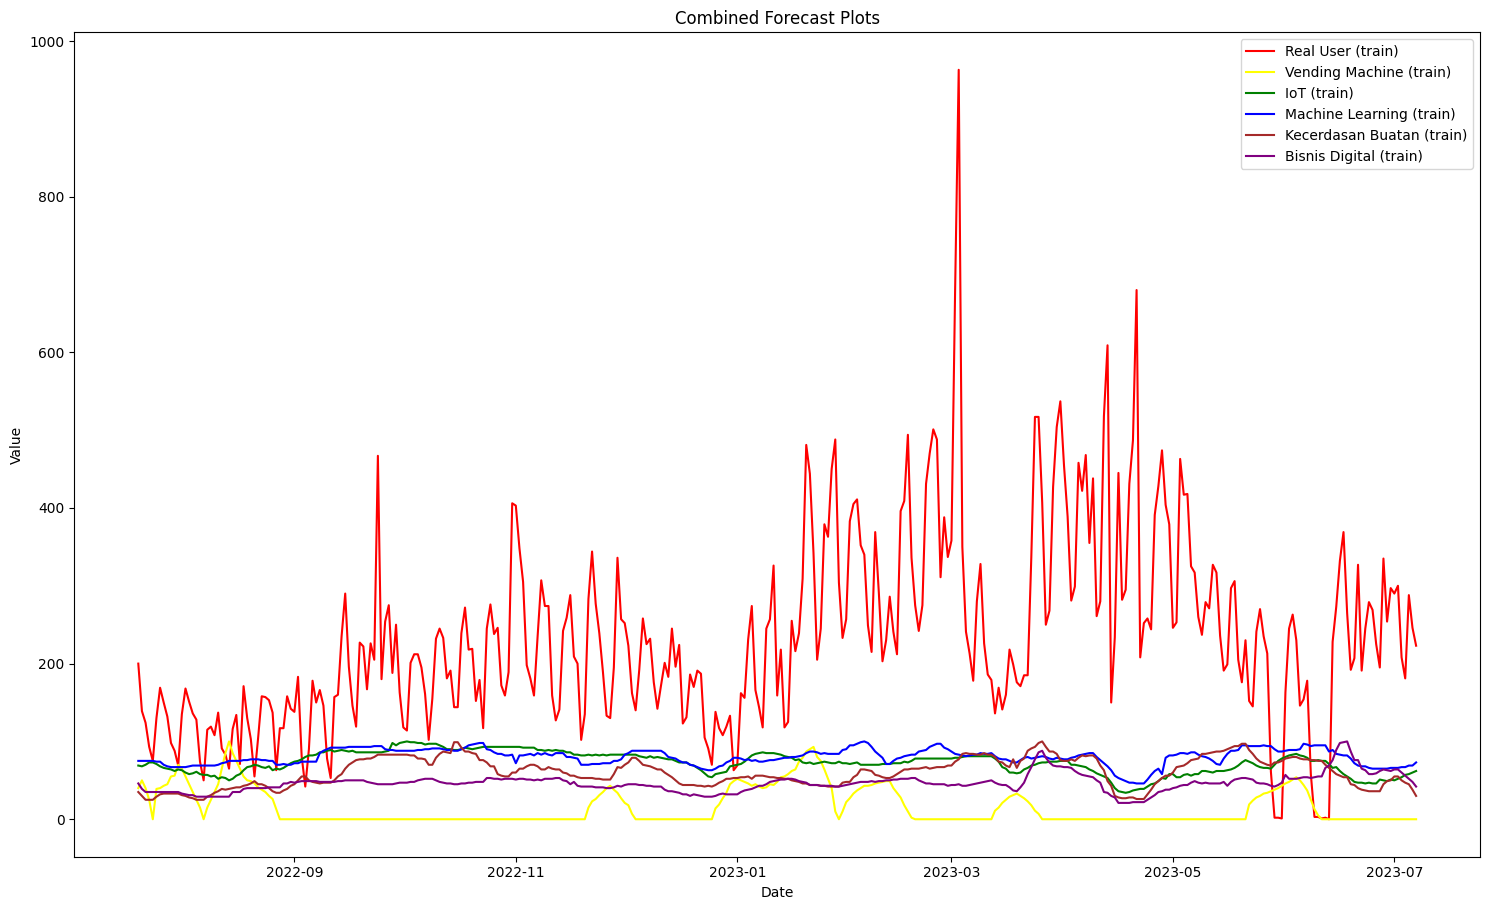

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the figsize as needed

# Plot all categories in one plot with different colors
ax.plot(train_data["Date_int"], train_data["Real User"], label="Real User (train)", color="red")
ax.plot(train_data["Date_int"], train_data["vending machine"], label="Vending Machine (train)", color="yellow")
ax.plot(train_data["Date_int"], train_data["iot"], label="IoT (train)", color="green")
ax.plot(train_data["Date_int"], train_data["machine learning"], label="Machine Learning (train)", color="blue")
ax.plot(train_data["Date_int"], train_data["kecerdasan buatan"], label="Kecerdasan Buatan (train)", color="brown")
ax.plot(train_data["Date_int"], train_data["bisnis digital"], label="Bisnis Digital (train)", color="purple")

# Set labels and title
ax.set(xlabel='Date', ylabel='Value', title='Combined Forecast Plots')
ax.legend()

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot
plt.savefig('combined_forecast_plots_1.png')

# Show the plot
plt.show()
